# **Default of Credit Card Clients**

### **Name : Sreeraj S**
### **Organization : Entri Elevate**
### **Date : 20-03-2025**

______

## **Overview of Problem Statement:**

This project is aimed at predicting the case of customers default payments in Taiwan. With the rise of credit card issuance, banks overextended credit to unqualified applicants, leading to excessive debt accumulation and increased defaults. This crisis impacted consumer confidence and posed challenges for both banks and cardholders.

Effective risk prediction is essential for minimizing financial uncertainty. By analyzing customer transactions, repayment history, and financial data, this project aims to build an automated model to predict credit card defaults. Identifying high-risk customers allows banks to take preventive measures, such as offering alternative repayment options, to reduce potential losses.

## **Objective:**
* To compare the predictive accuracy of default probability across multiple machine learning models.

* To assess the effectiveness of different models in estimating the true probability of default rather than just classifying clients into default and non-default groups.

## **Data Description:**
### Source:
**Dataset link:** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

### Data Description 
* ID: ID of each client
  
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
  
* SEX: Gender (1 = male, 2 = female)
  
* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
  
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
  
* AGE: Age in years

**Scale for PAY_0 to PAY_6 :** (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_0: Repayment status in September, 2005 (scale same as above)
  
* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)





## **Data Collection**

#### Importing Libraries

In [3]:
# Importing libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#### Dataset Loading

In [44]:
df=pd.read_csv('default of credit card clients.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Total No.Of Rows And Columns

In [46]:
df.shape

(30000, 25)

##### *To avoid confusion, the target column "default payment next month" has been renamed to "Default", and "PAY_0" has been renamed to "PAY_1".*

In [48]:
df.rename(columns={'default payment next month' : 'Is_Defaulter'}, inplace=True)
df.rename(columns={'PAY_0' : 'PAY_1'},inplace=True)

In [50]:
pd.set_option('display.max_columns',None)

#### First Five Rows

In [52]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Last Five Rows

In [54]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


#### About Columns

In [56]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Is_Defaulter'],
      dtype='object')

#### Data Info

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            30000 non-null  int64
 1   LIMIT_BAL     30000 non-null  int64
 2   SEX           30000 non-null  int64
 3   EDUCATION     30000 non-null  int64
 4   MARRIAGE      30000 non-null  int64
 5   AGE           30000 non-null  int64
 6   PAY_1         30000 non-null  int64
 7   PAY_2         30000 non-null  int64
 8   PAY_3         30000 non-null  int64
 9   PAY_4         30000 non-null  int64
 10  PAY_5         30000 non-null  int64
 11  PAY_6         30000 non-null  int64
 12  BILL_AMT1     30000 non-null  int64
 13  BILL_AMT2     30000 non-null  int64
 14  BILL_AMT3     30000 non-null  int64
 15  BILL_AMT4     30000 non-null  int64
 16  BILL_AMT5     30000 non-null  int64
 17  BILL_AMT6     30000 non-null  int64
 18  PAY_AMT1      30000 non-null  int64
 19  PAY_AMT2      30000 non-n

#### Data Description

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [62]:
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [64]:
df['Is_Defaulter'].value_counts()

Is_Defaulter
0    23364
1     6636
Name: count, dtype: int64

## **Data Preprocessing - Data Cleaning**

In [66]:
df.duplicated().sum()

0

In [68]:
print("Missing values in each column:\n")
df.isnull().sum()

Missing values in each column:



ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
Is_Defaulter    0
dtype: int64

**Dataset does not contains any NA values, null values and duplicates****

## **Exploratory Data Analysis (EDA)**

In [70]:
#Dropping ID Column
df = df.drop(['ID'], axis=1)

In [72]:
num_data= df.select_dtypes('number')
num_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [74]:
numeric_columns=list(num_data)
numeric_columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Is_Defaulter']

In [78]:
num_data.skew()

LIMIT_BAL        0.992867
SEX             -0.424183
EDUCATION        0.970972
MARRIAGE        -0.018742
AGE              0.732246
PAY_1            0.731975
PAY_2            0.790565
PAY_3            0.840682
PAY_4            0.999629
PAY_5            1.008197
PAY_6            0.948029
BILL_AMT1        2.663861
BILL_AMT2        2.705221
BILL_AMT3        3.087830
BILL_AMT4        2.821965
BILL_AMT5        2.876380
BILL_AMT6        2.846645
PAY_AMT1        14.668364
PAY_AMT2        30.453817
PAY_AMT3        17.216635
PAY_AMT4        12.904985
PAY_AMT5        11.127417
PAY_AMT6        10.640727
Is_Defaulter     1.343504
dtype: float64

<Axes: xlabel='AGE', ylabel='count'>

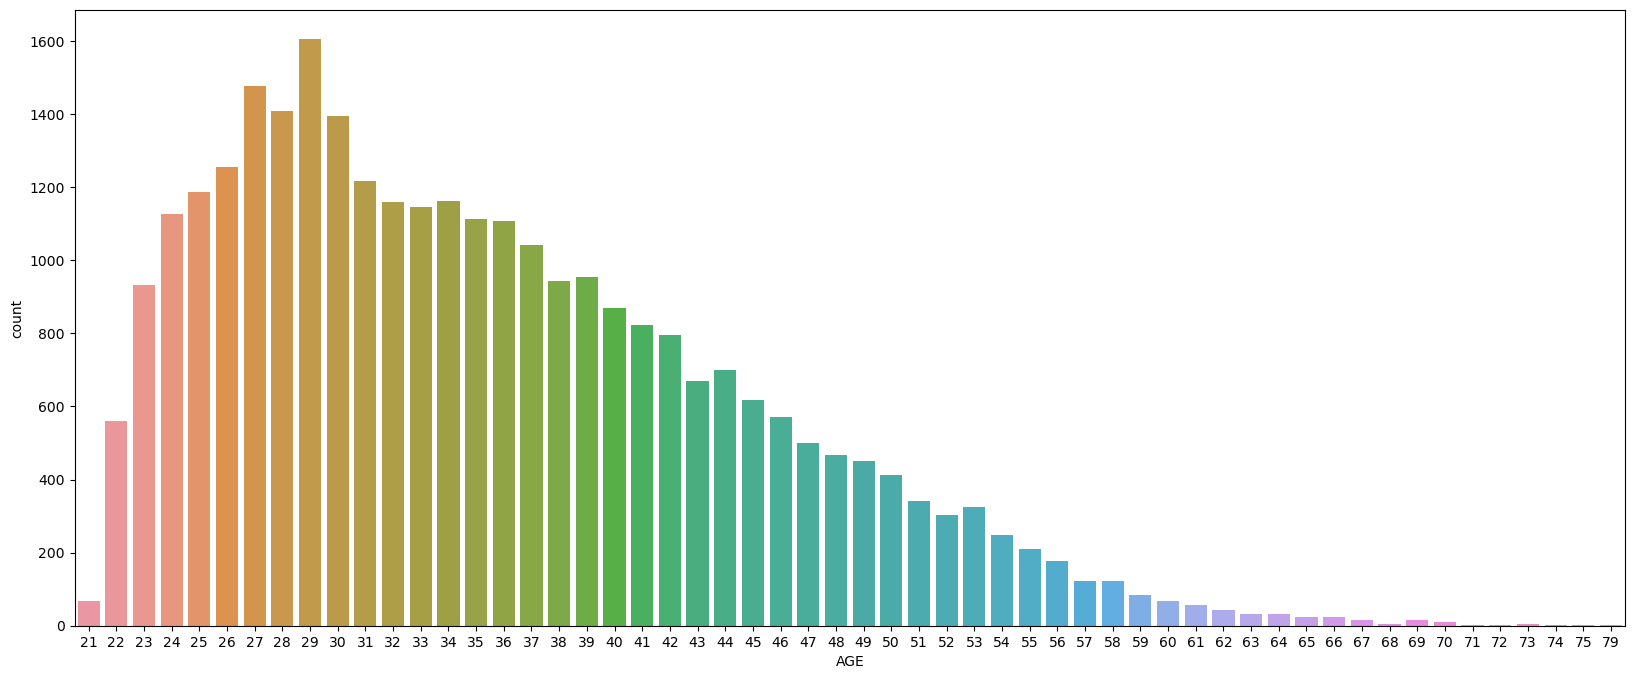

In [247]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

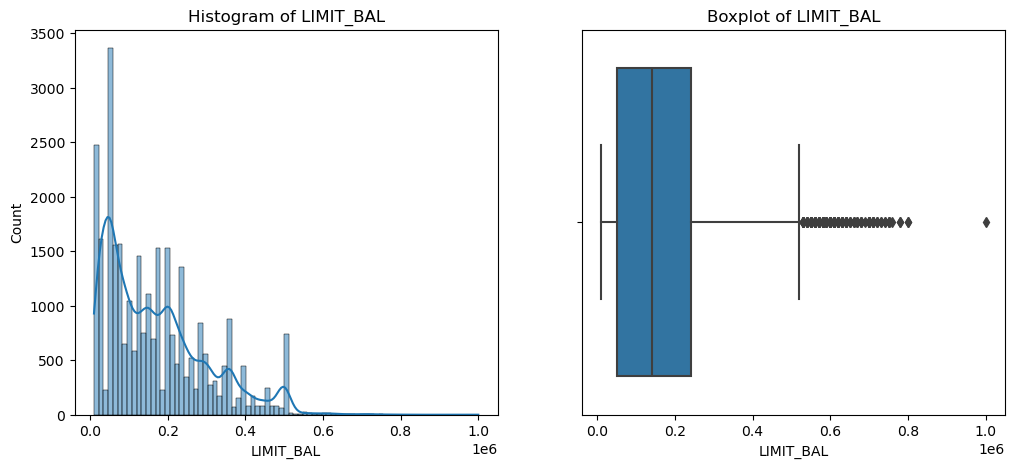

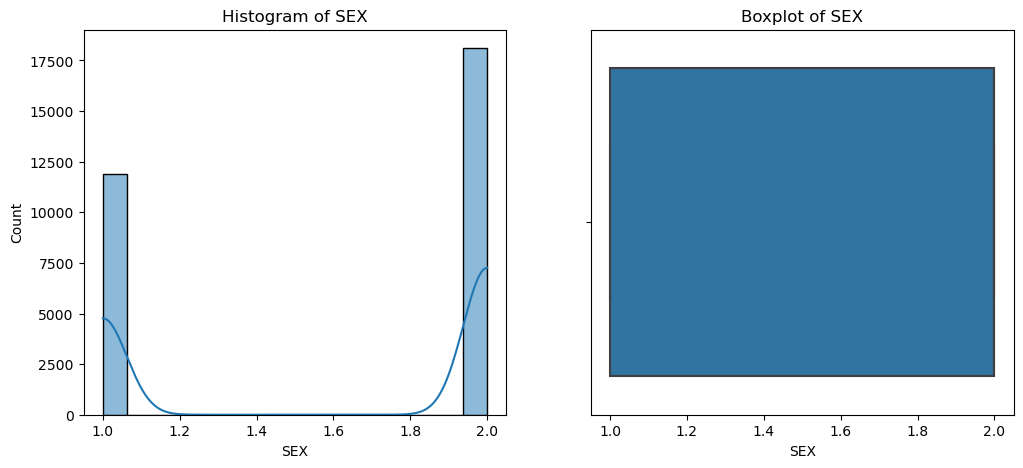

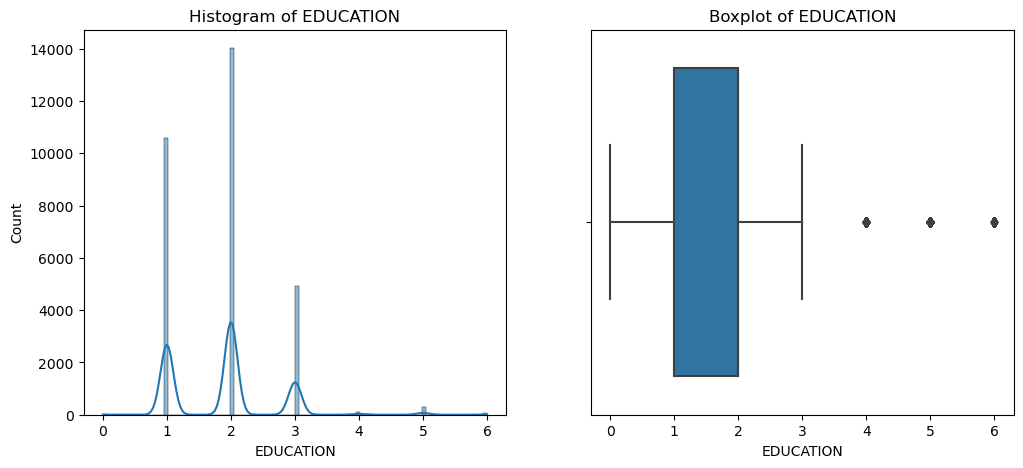

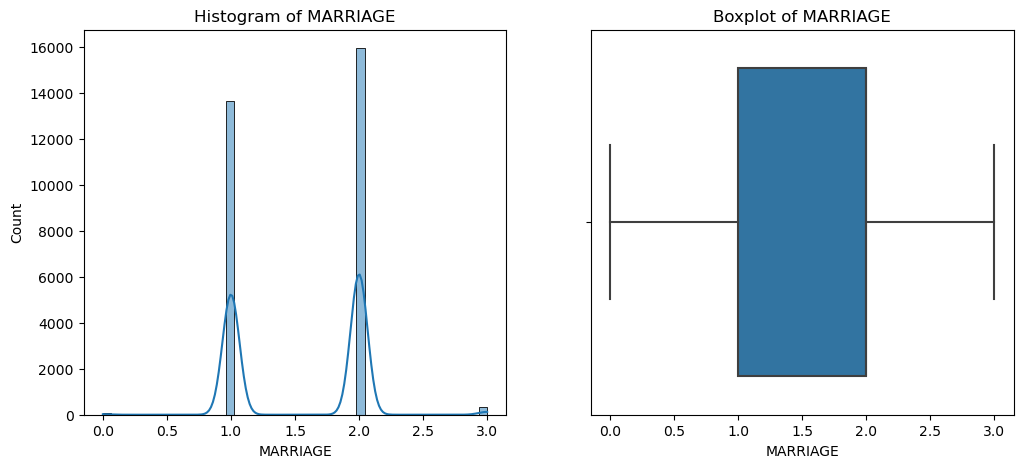

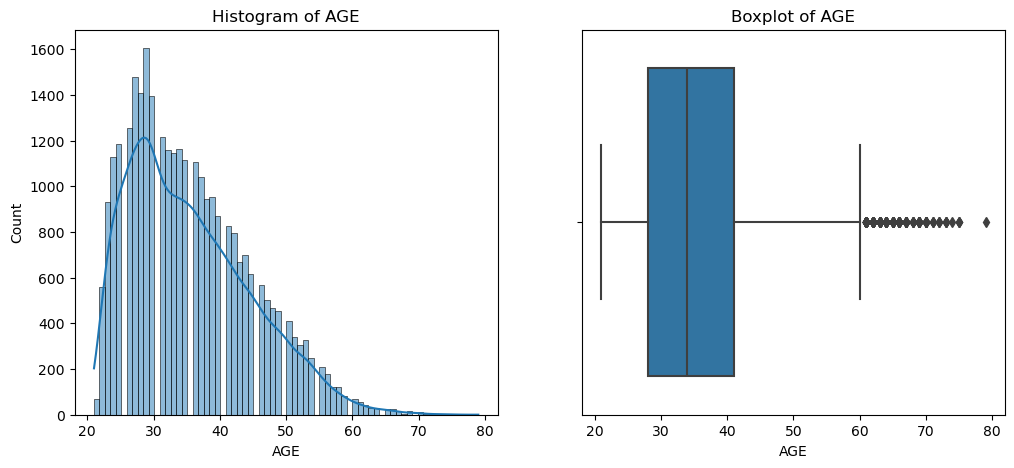

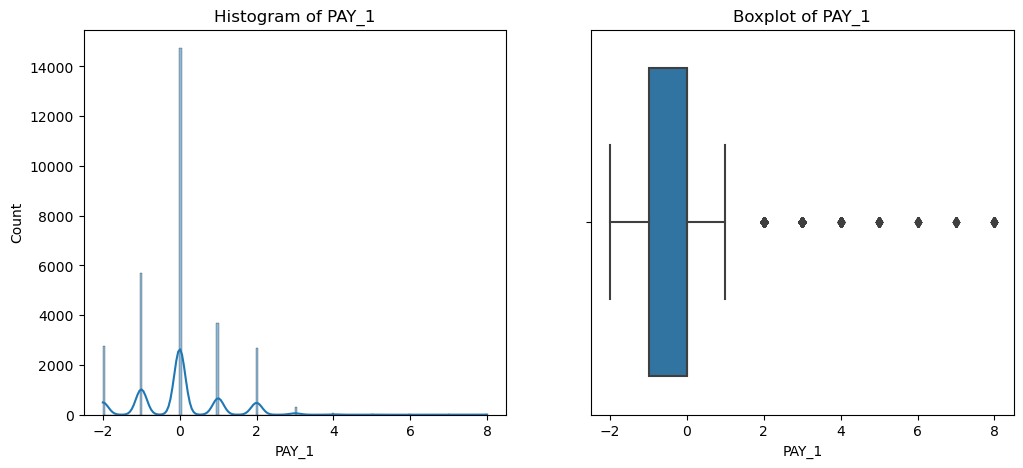

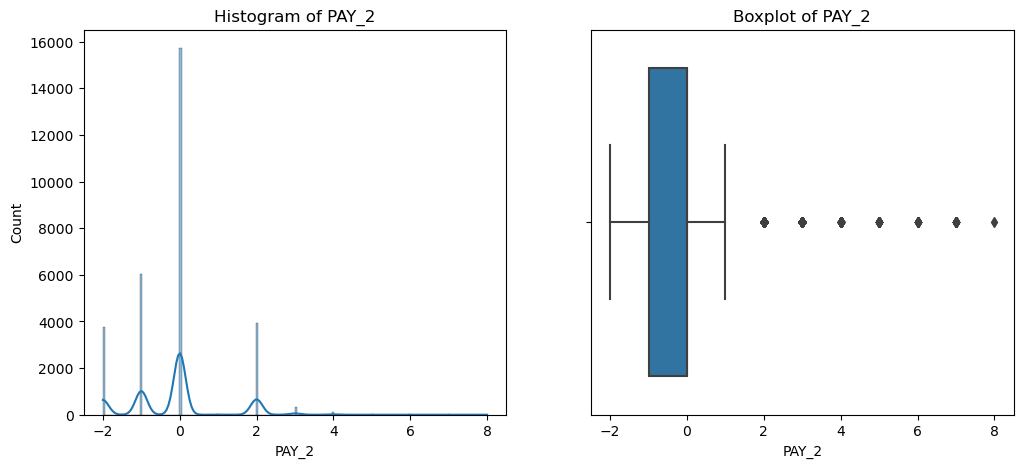

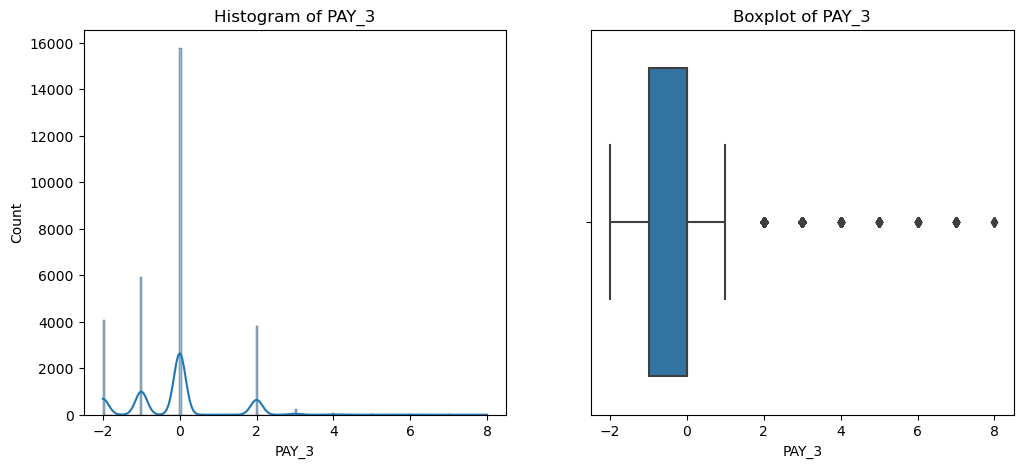

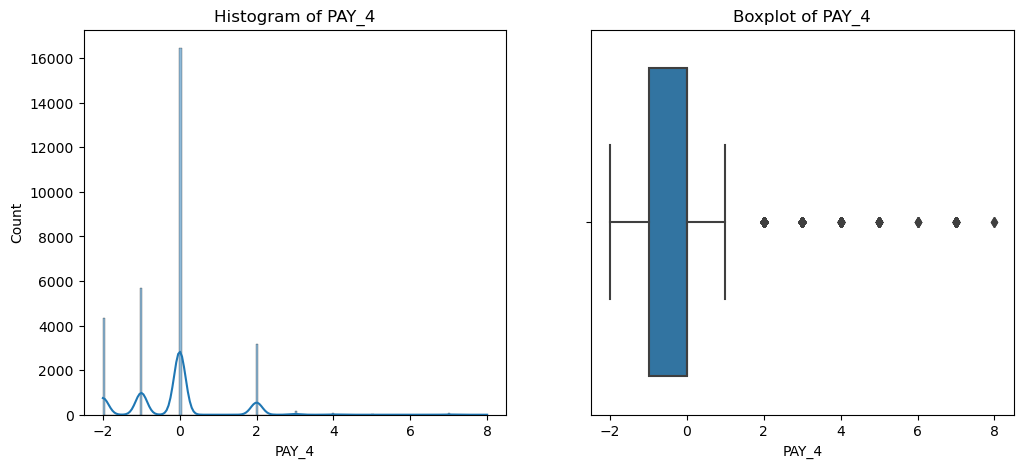

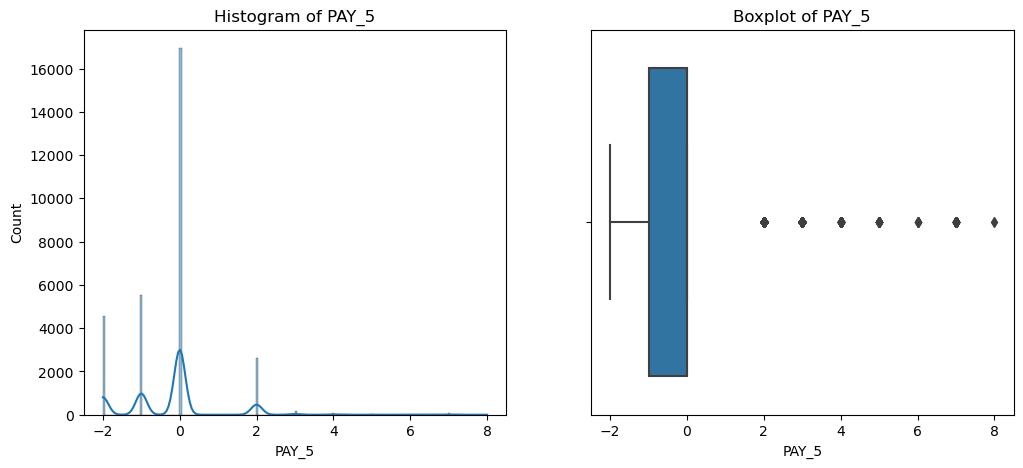

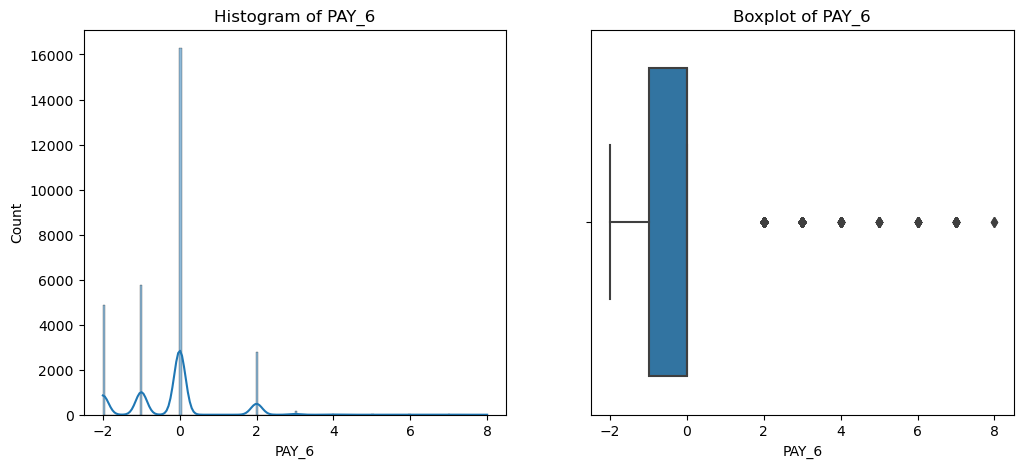

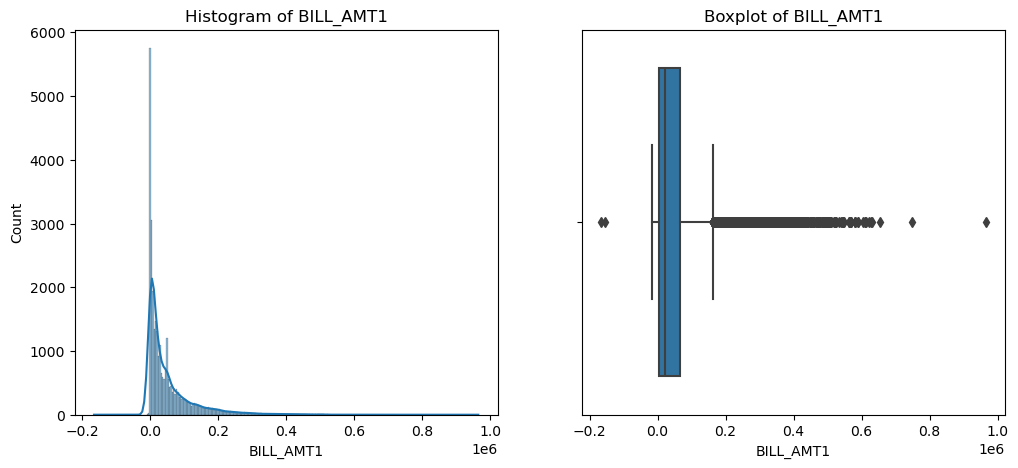

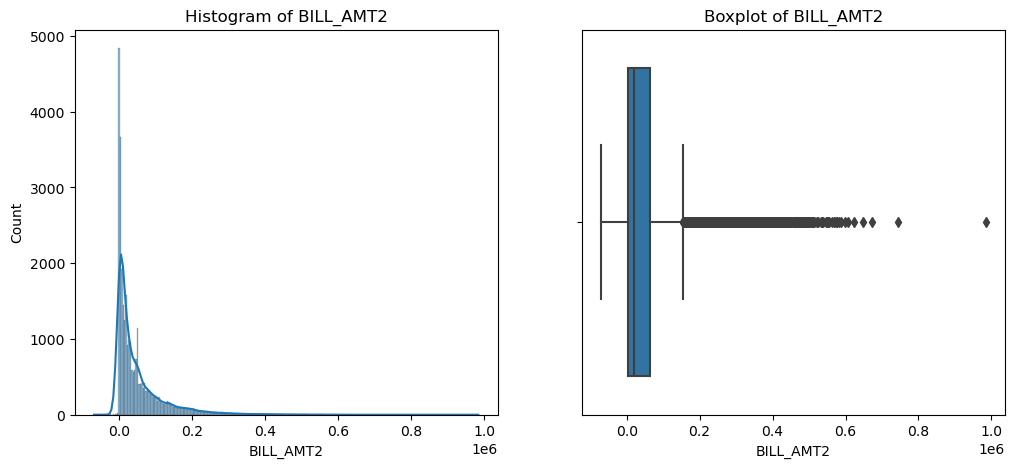

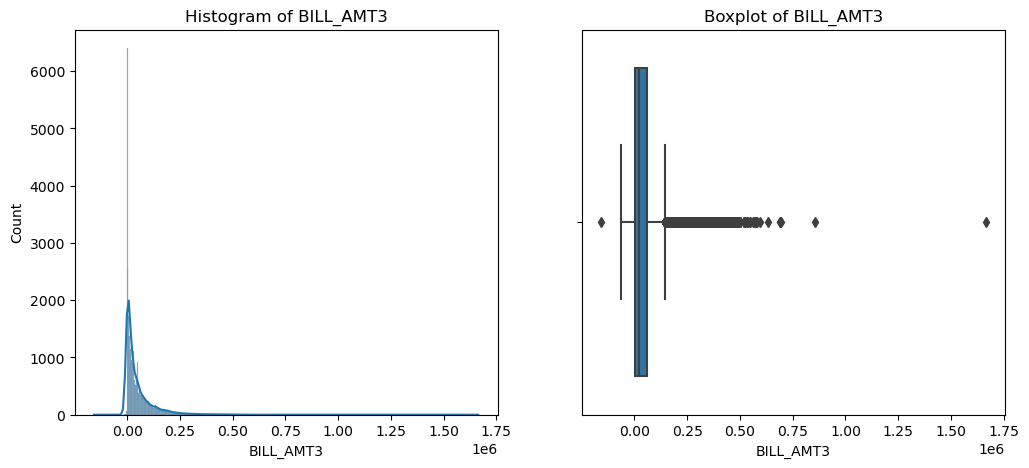

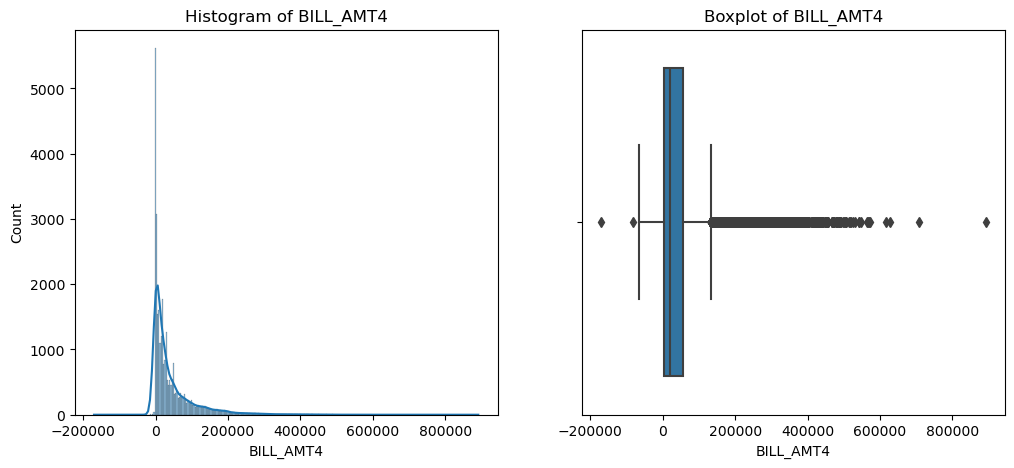

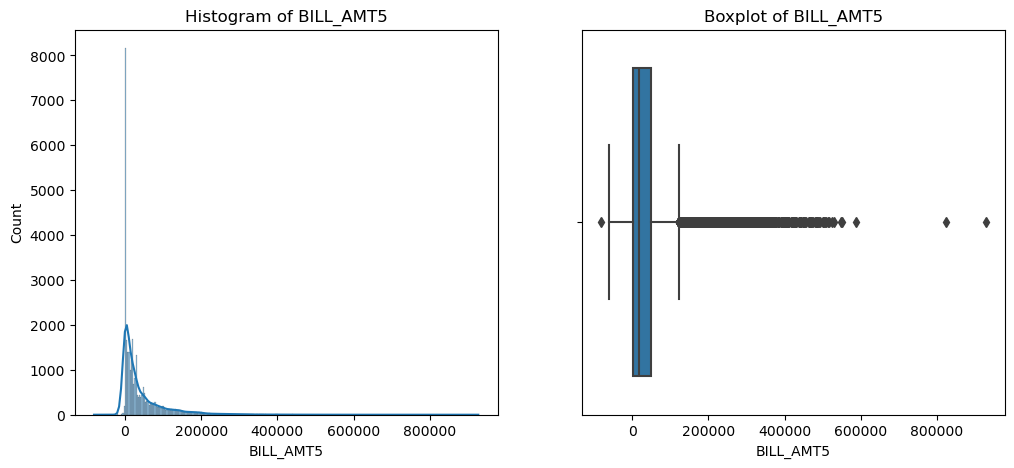

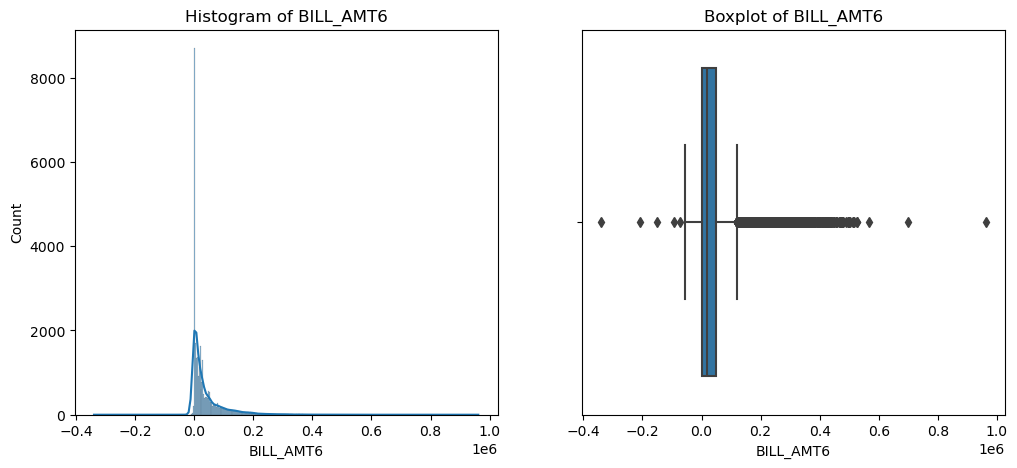

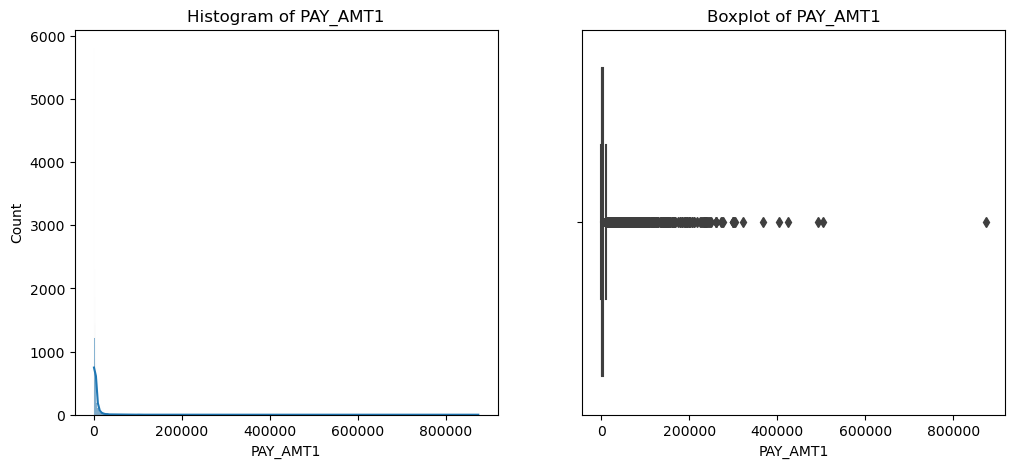

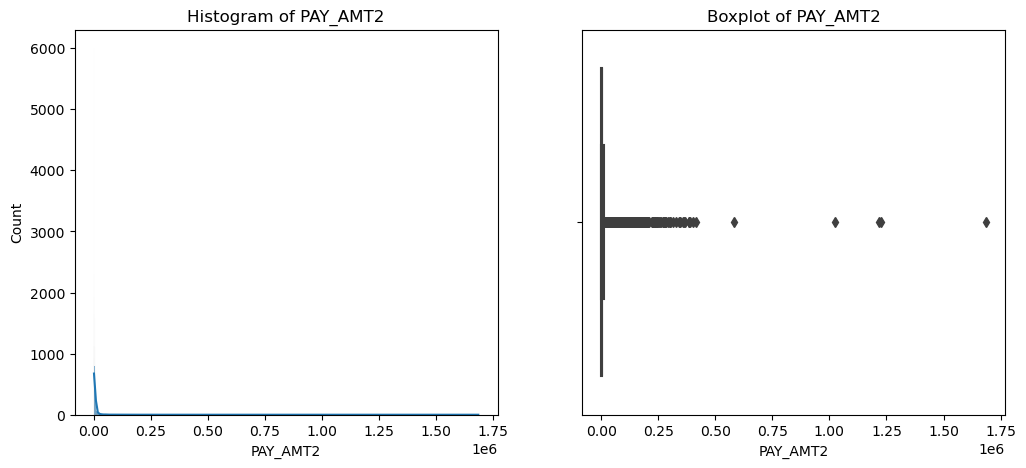

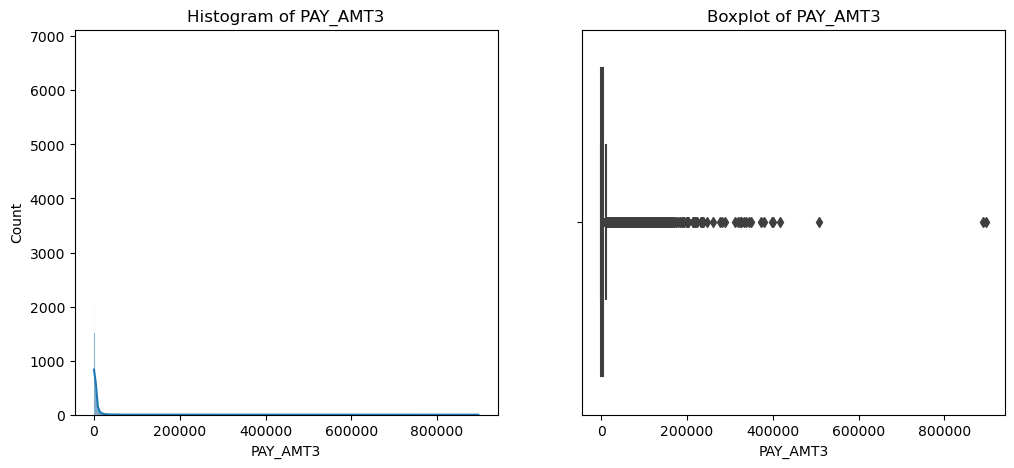

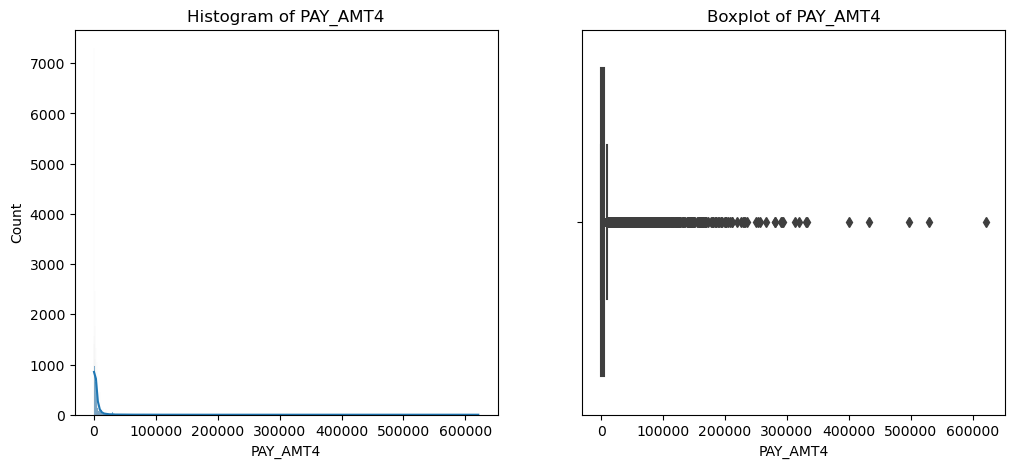

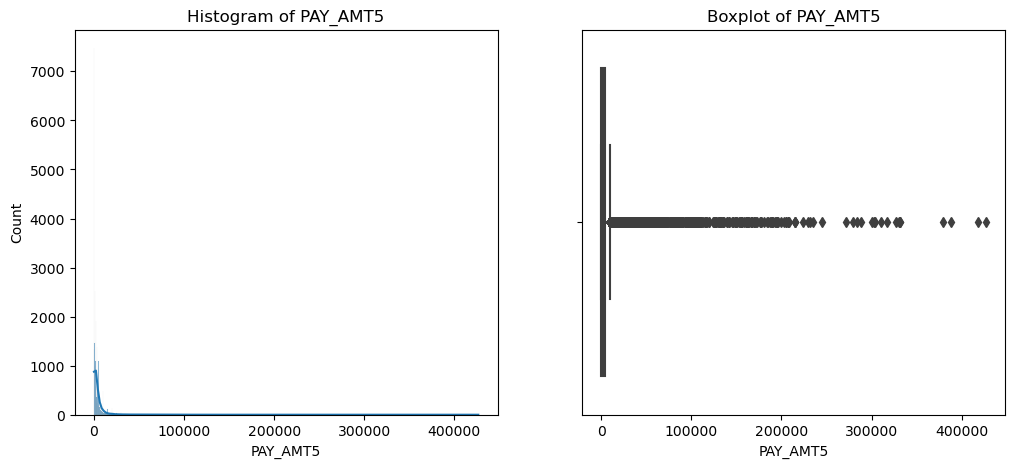

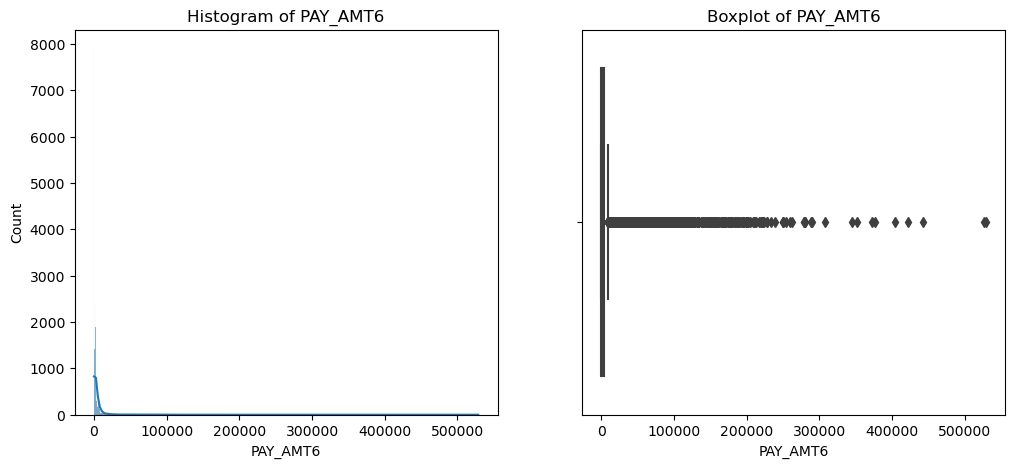

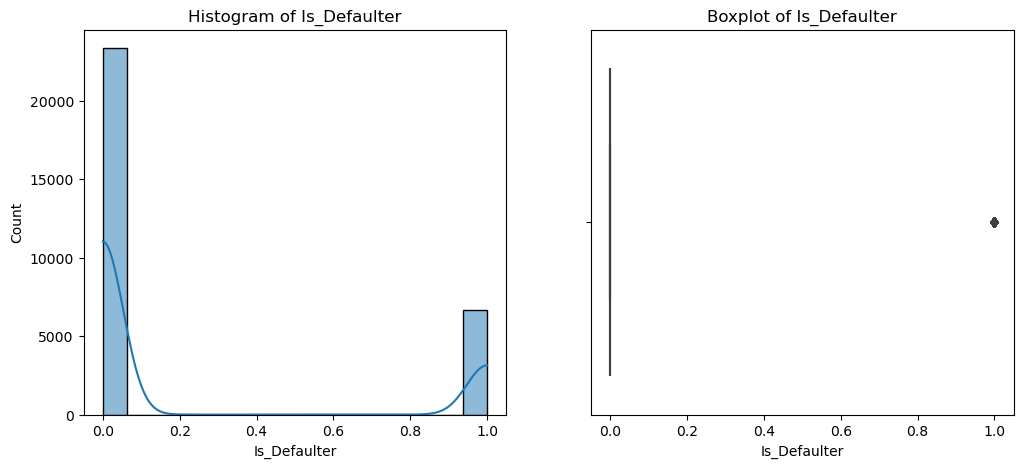

In [80]:
for column in numeric_columns:
    plt.figure(figsize=(12,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram of {column}')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

<Axes: >

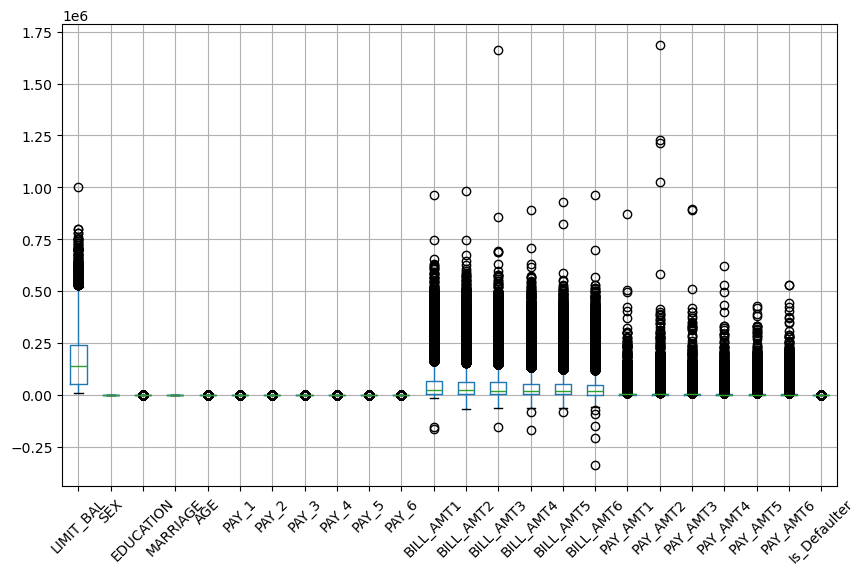

In [51]:
df.boxplot(figsize = (10,6),rot = 45)

#### *The dataset has skewness, so we must handle it.*

### Handling Outliers

In [81]:
def remove_outliers(df, columns):
    data_filtered = df.copy()  # Make a copy of the original DataFrame
    for col in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper whiskers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows where values are within whiskers
        data_filtered = data_filtered[(data_filtered[col] >= lower_bound) & (data_filtered[col] <= upper_bound)]
    return data_filtered

numerical_features = df1.select_dtypes(include=['float64','int64']).columns

In [82]:
dff = remove_outliers(df, ['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])

In [83]:
dff.select_dtypes("number").skew()

LIMIT_BAL       0.994593
SEX            -0.483218
EDUCATION       0.265633
MARRIAGE       -0.026143
AGE             0.595217
PAY_1          -0.636270
PAY_2          -0.826720
PAY_3          -0.740238
PAY_4          -0.687889
PAY_5          -0.654950
PAY_6          -0.565359
BILL_AMT1       1.284458
BILL_AMT2       1.314599
BILL_AMT3       1.380748
BILL_AMT4       1.478061
BILL_AMT5       1.592753
BILL_AMT6       1.659032
PAY_AMT1        1.411210
PAY_AMT2        1.528772
PAY_AMT3        1.683341
PAY_AMT4        1.568095
PAY_AMT5        1.572362
PAY_AMT6        1.673994
Is_Defaulter    1.960577
dtype: float64

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


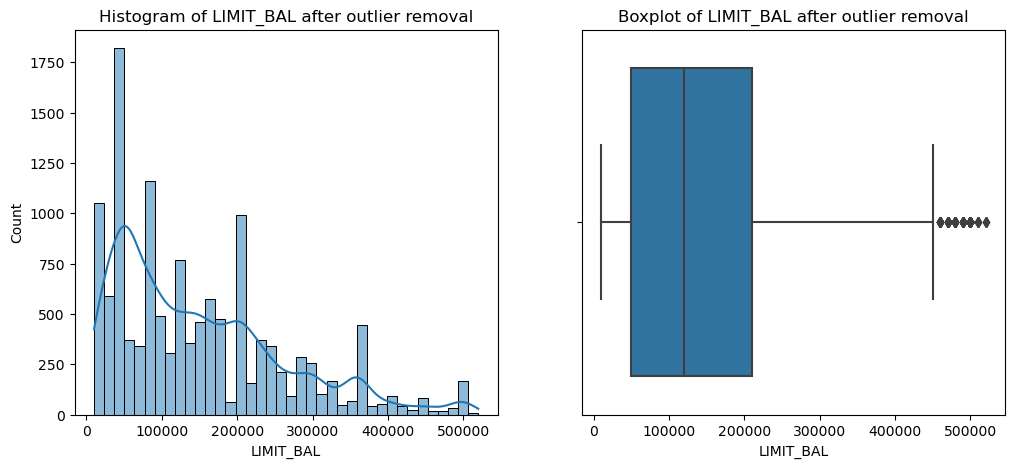

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


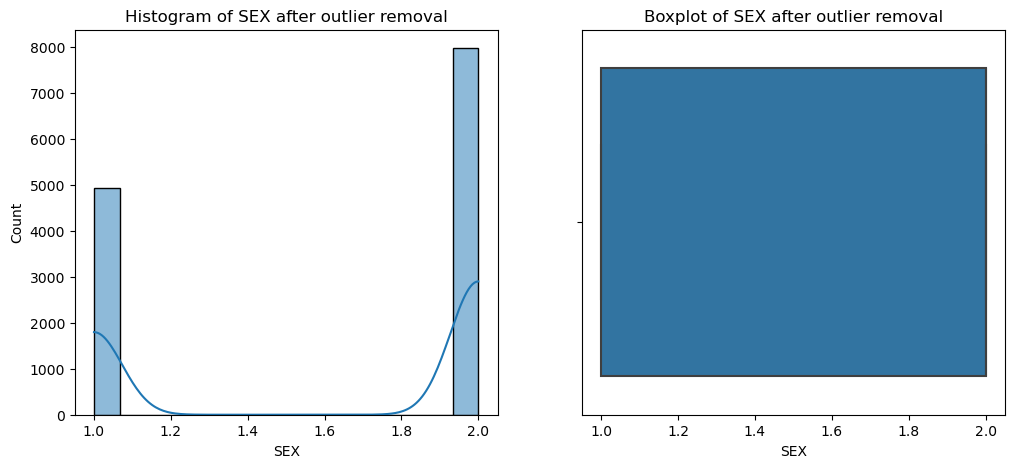

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


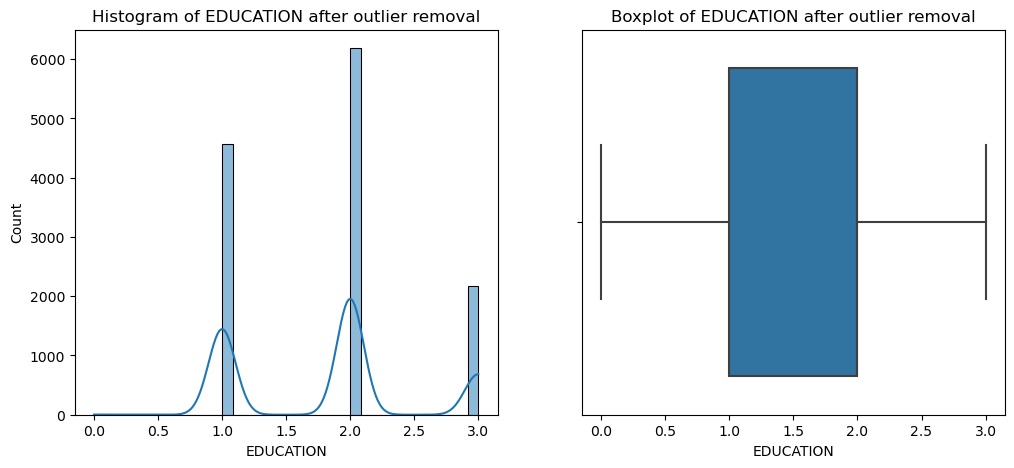

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


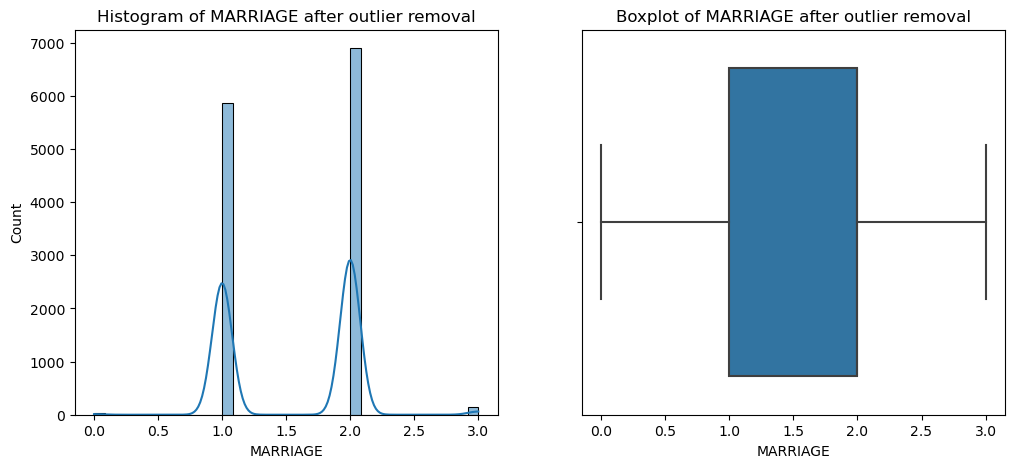

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


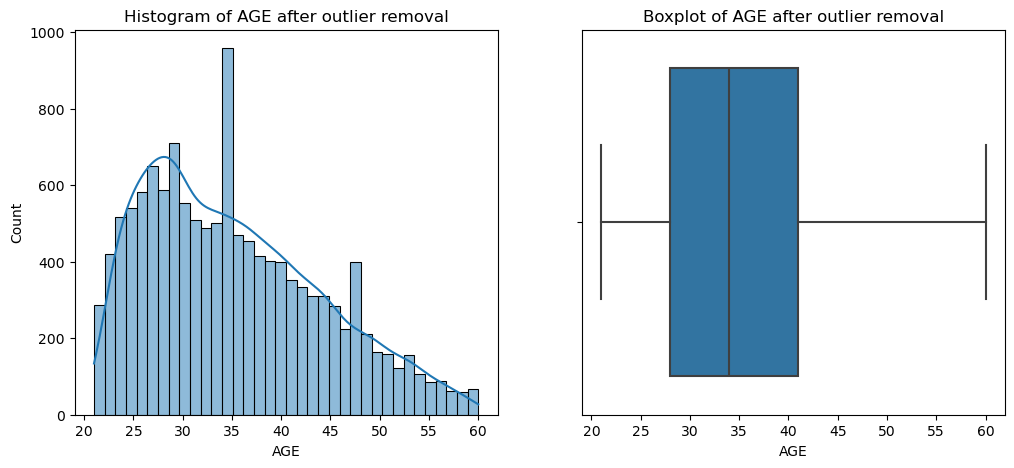

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


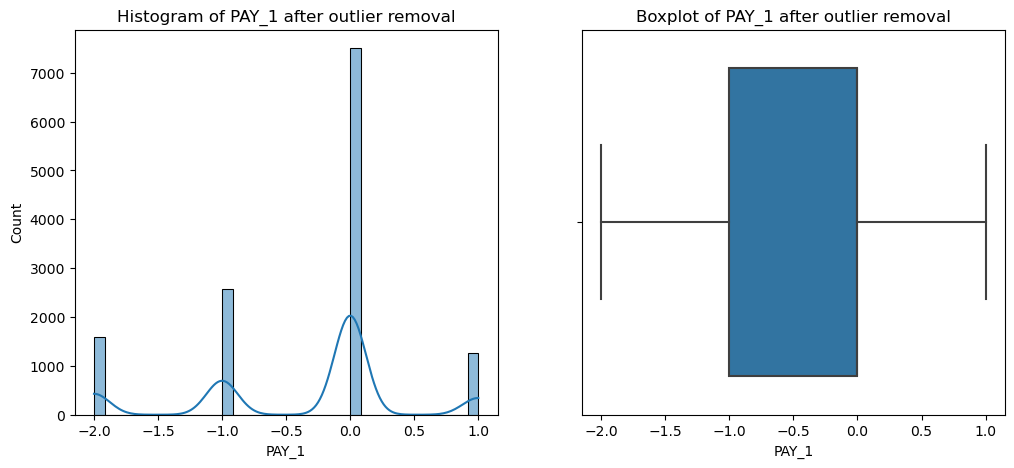

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


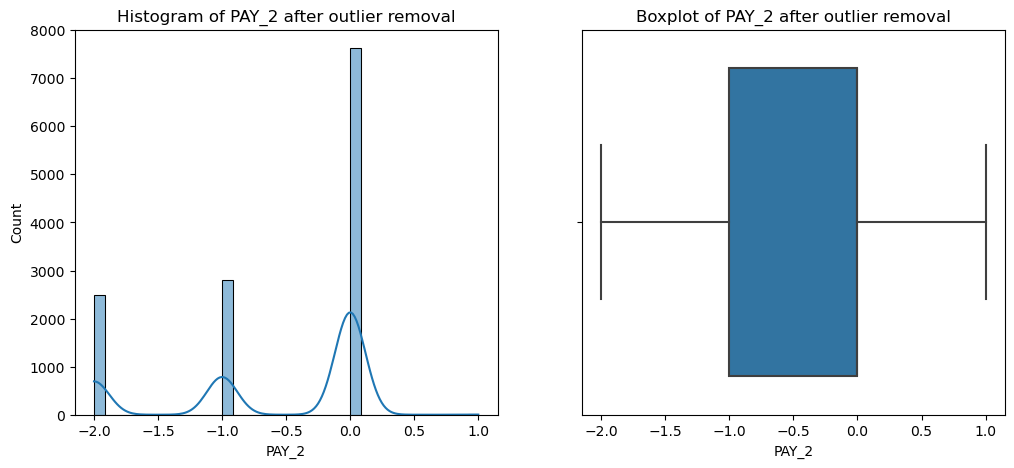

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


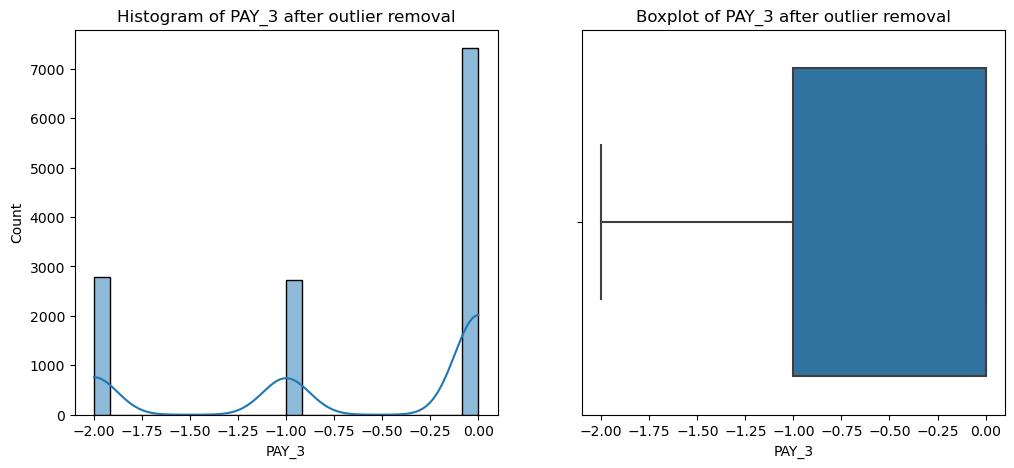

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


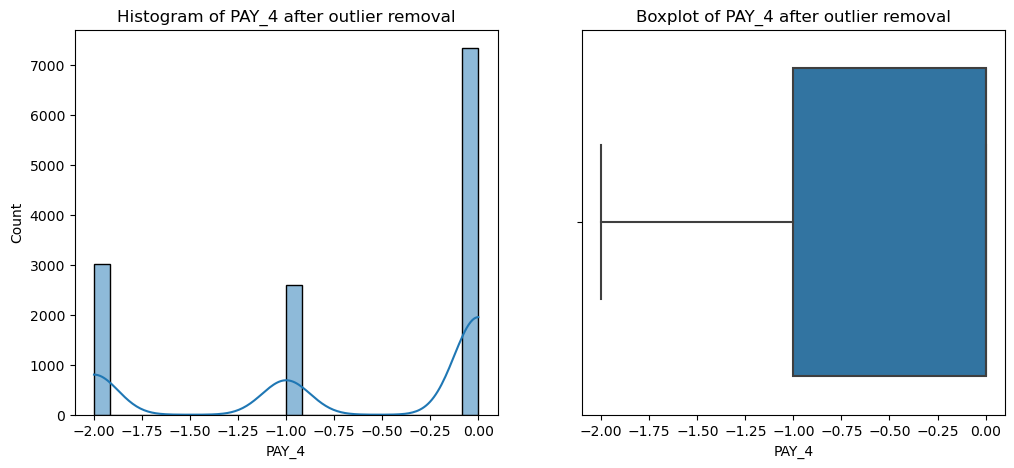

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


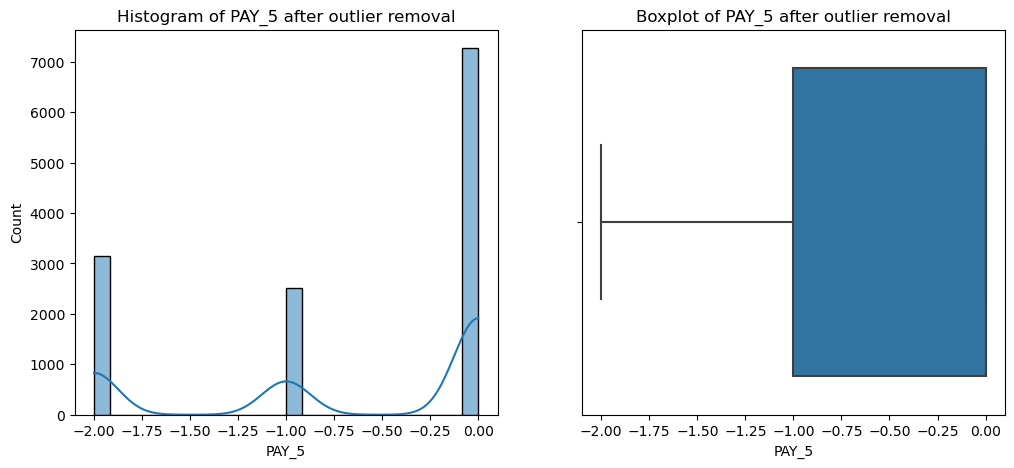

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


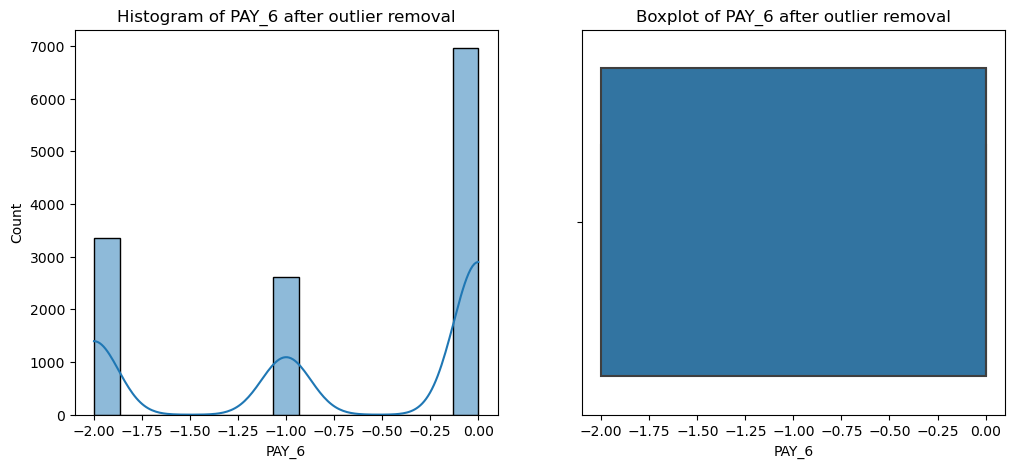

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


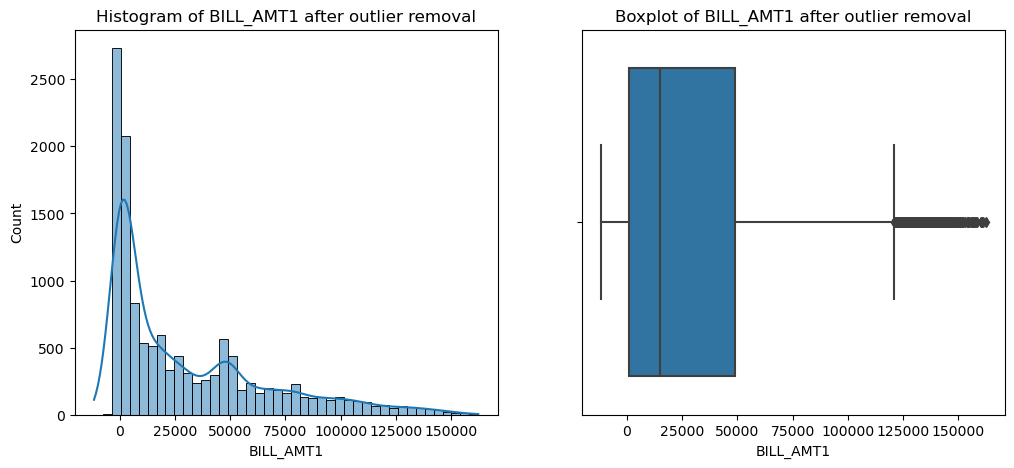

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


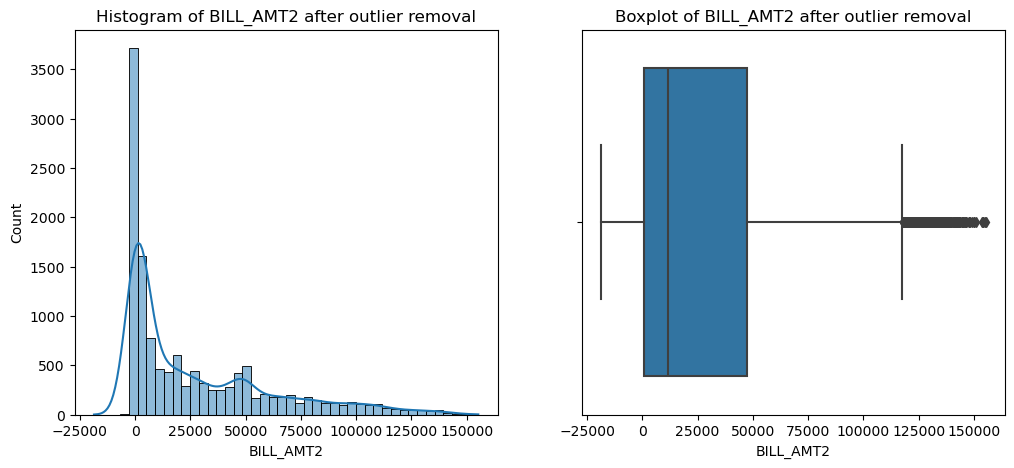

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


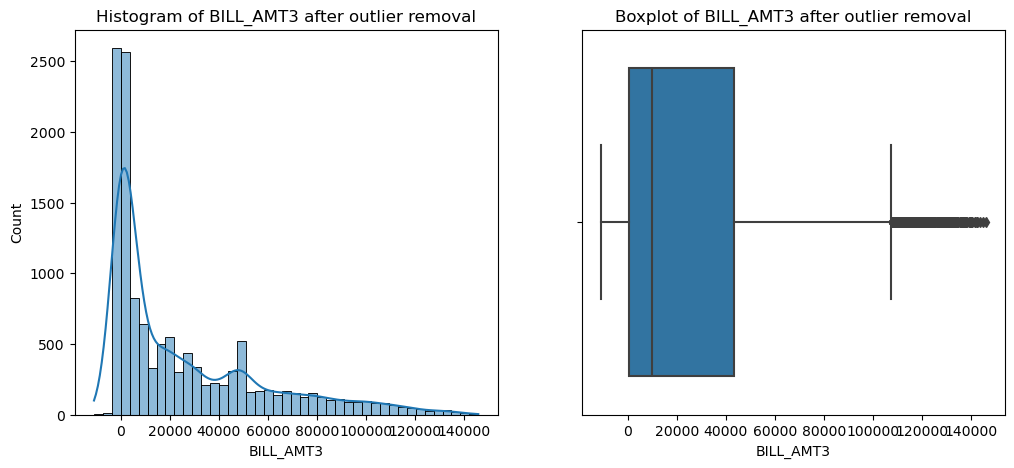

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


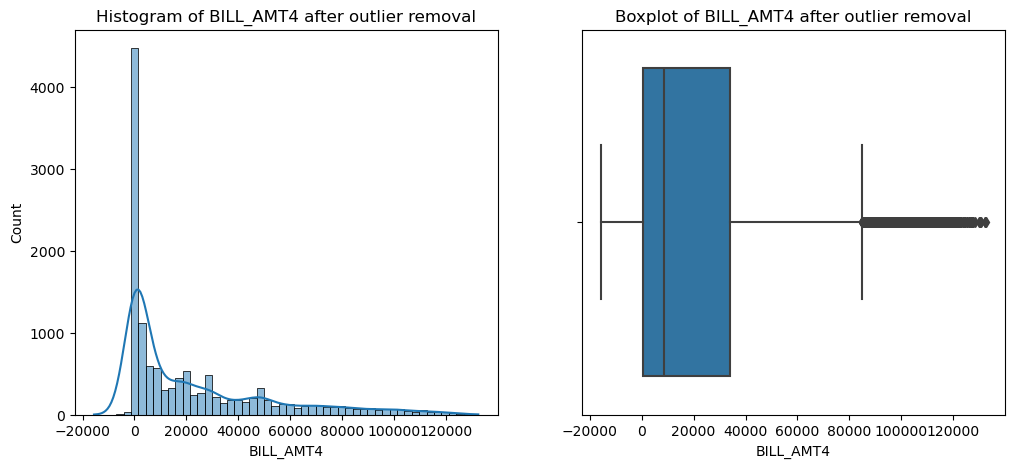

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


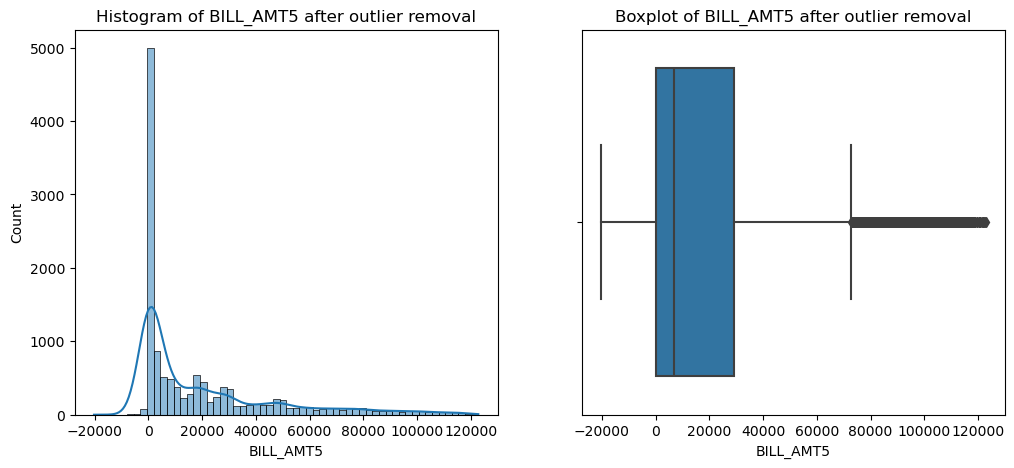

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


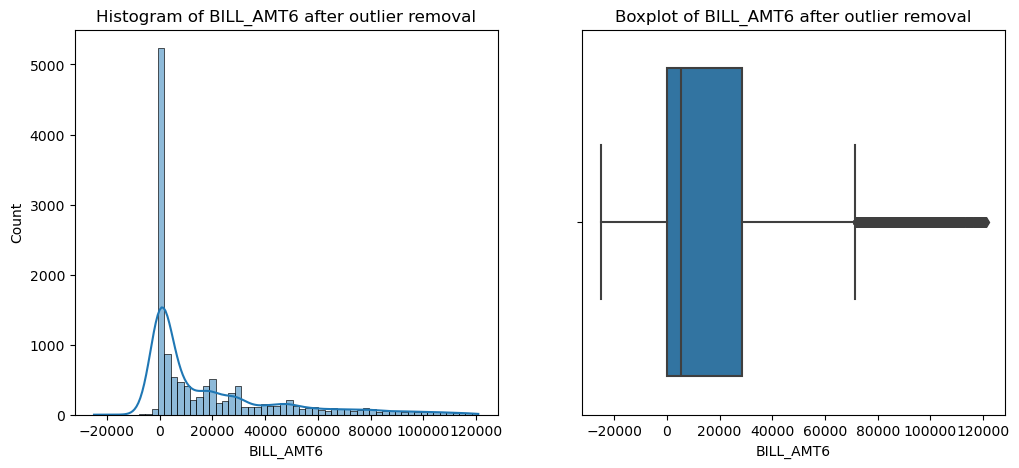

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


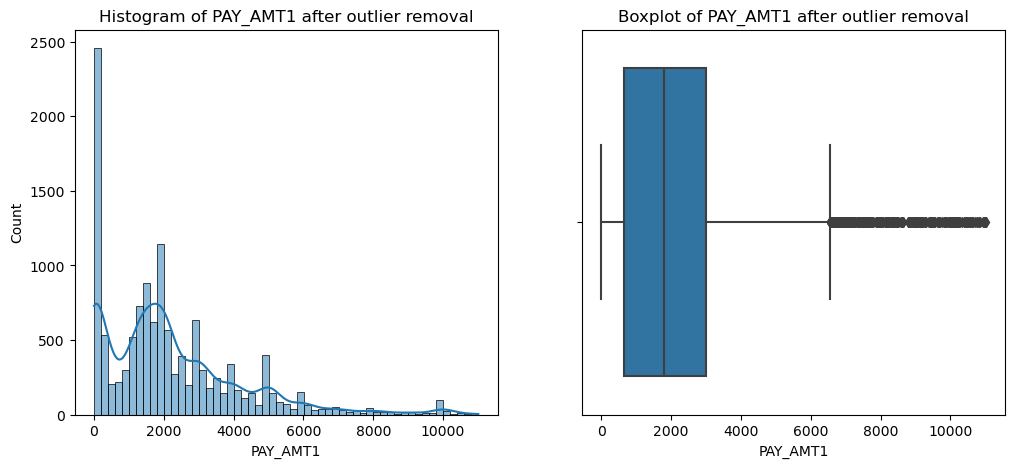

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


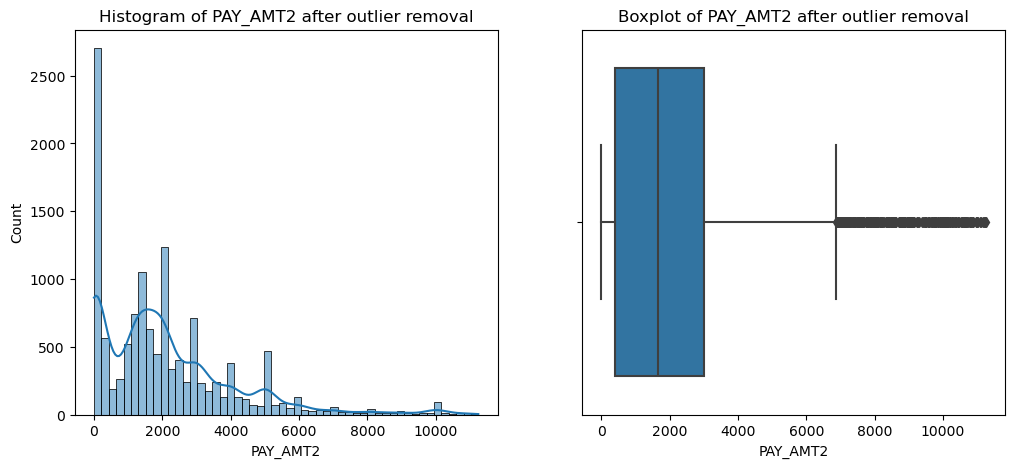

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


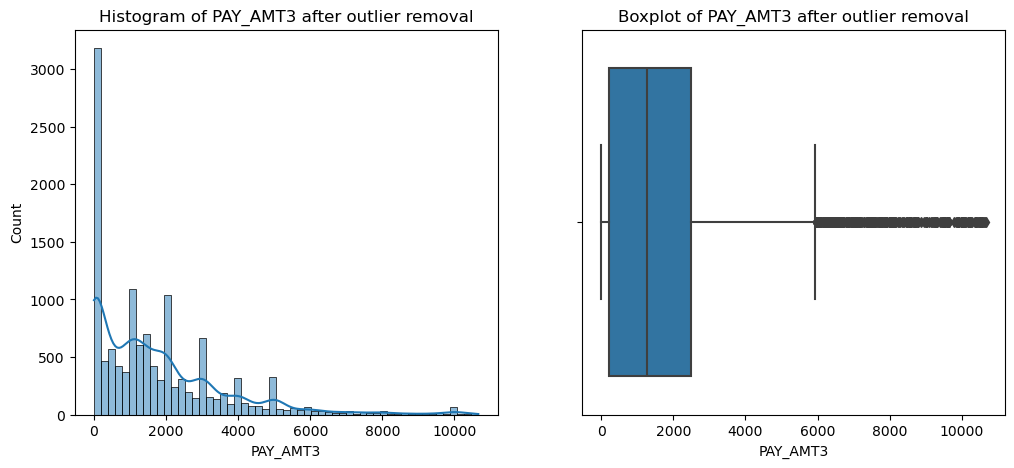

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


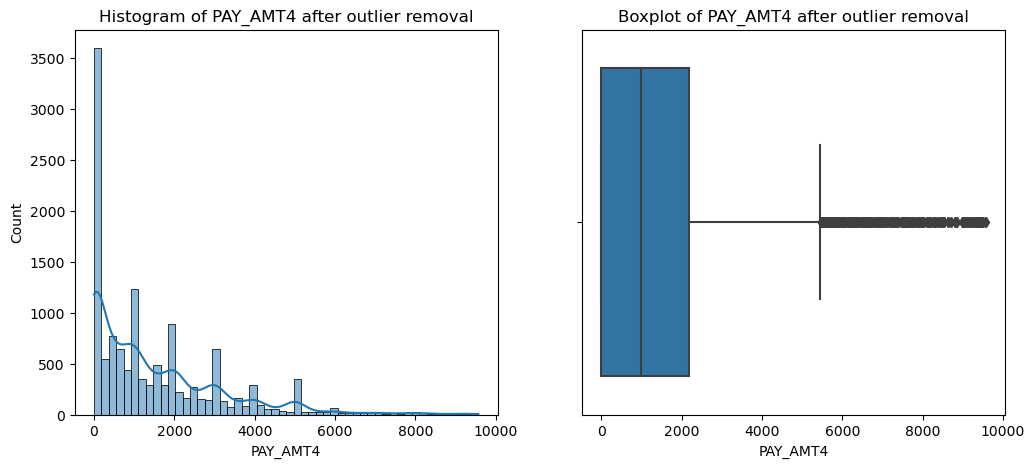

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


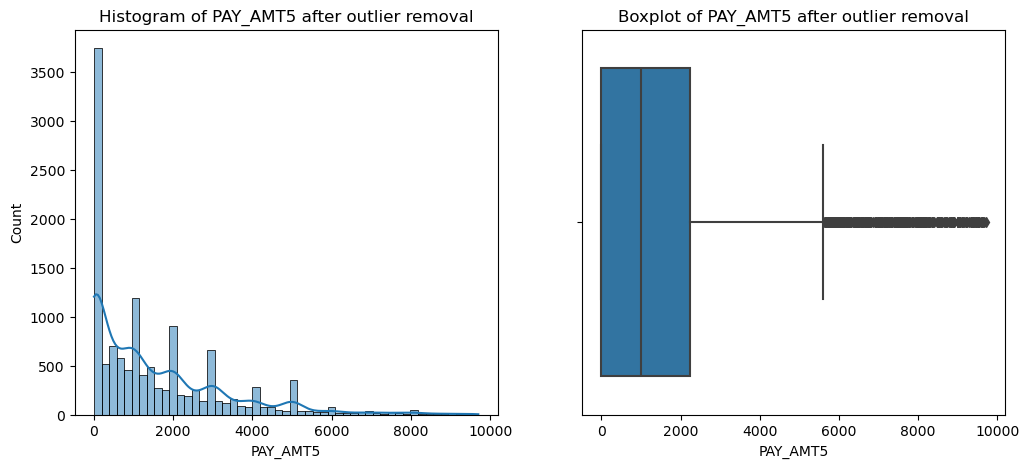

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


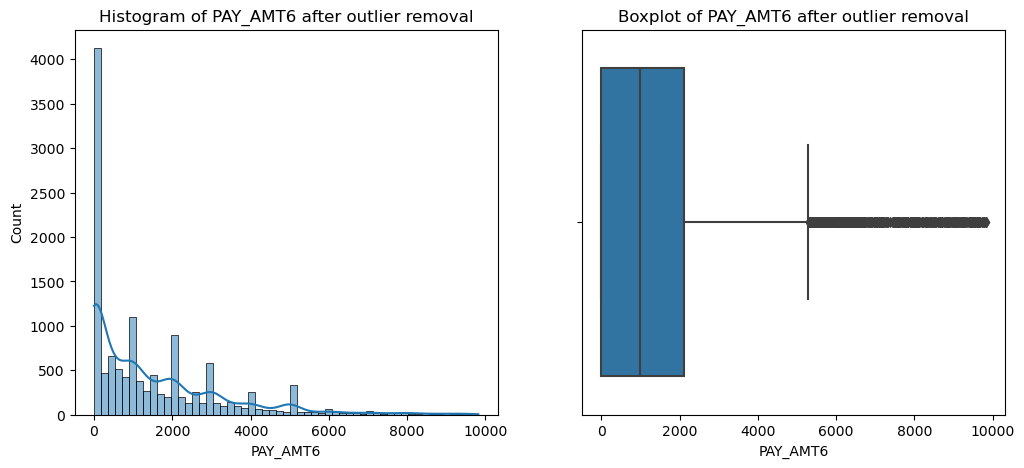

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


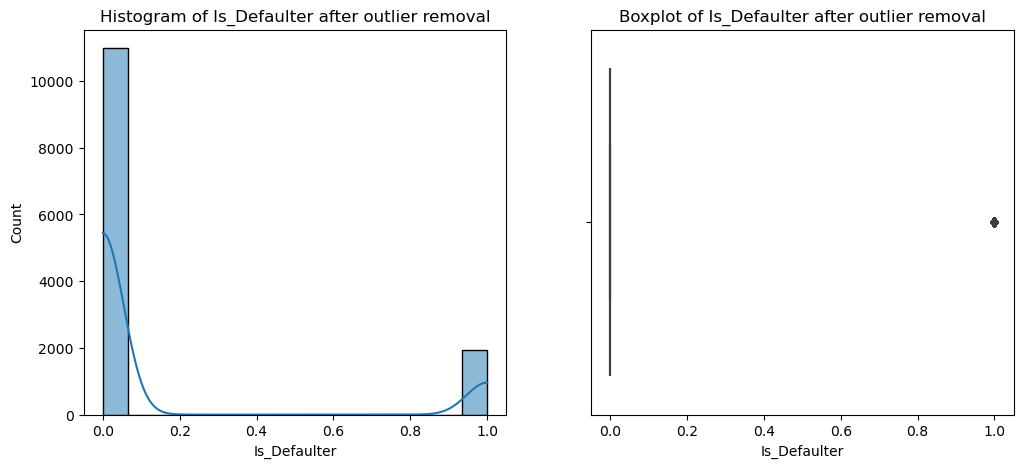

In [92]:
# Visualize the cleaned data again to confirm outliers are removed
for column in dff:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dff[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dff[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

<Axes: >

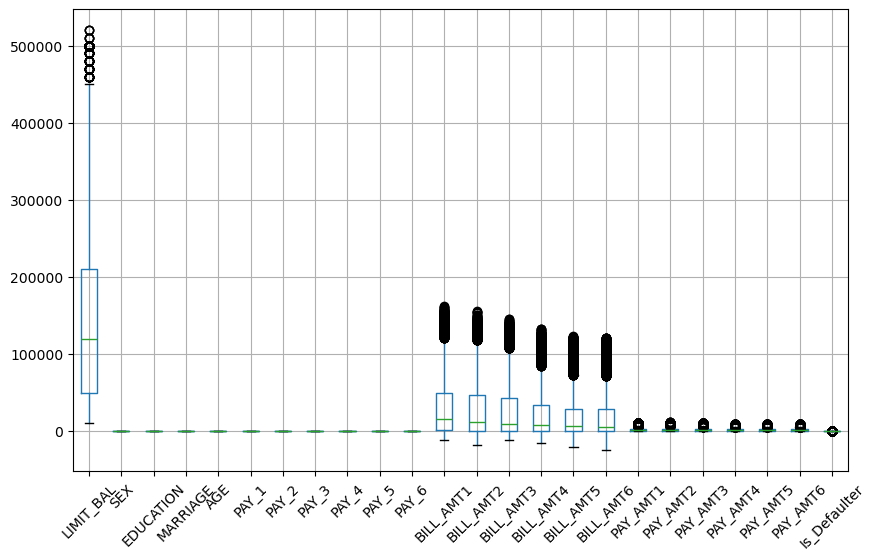

In [93]:
dff.boxplot(figsize = (10,6),rot = 45)

#### Managing outliers using Capping method
 After applying IQR-based outlier removal, extreme values were reduced, but some features remain skewed. To manage these outliers, the **capping method** is applied to limit extreme values.

**Capping Method** : In capping, upper and lower bounds were set for selected features using the .25th (Q1) and .75th (Q3) percentiles. Any values exceeding these limits were adjusted to the respective boundary to manage outliers effectively.

In [96]:
def cap_outliers(dff,columns_to_cap):
    df_cap = dff.copy()

    for col in columns_to_cap:
        Q1 = df_cap[col].quantile(0.25)
        Q3 = df_cap[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cap[col]= df_cap[col].clip(lower=lower_bound, upper=upper_bound)

    return df_cap

columns_to_cap = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
dff_cap = cap_outliers(dff, columns_to_cap)

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


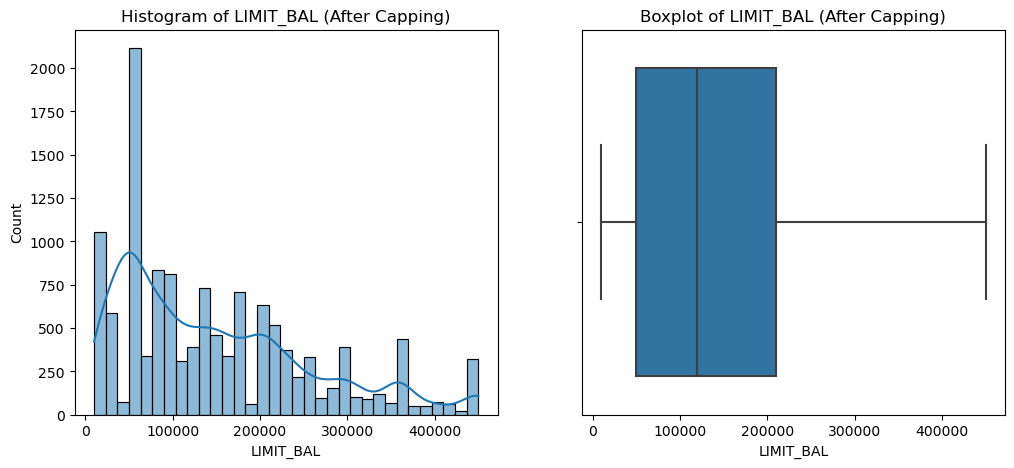

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


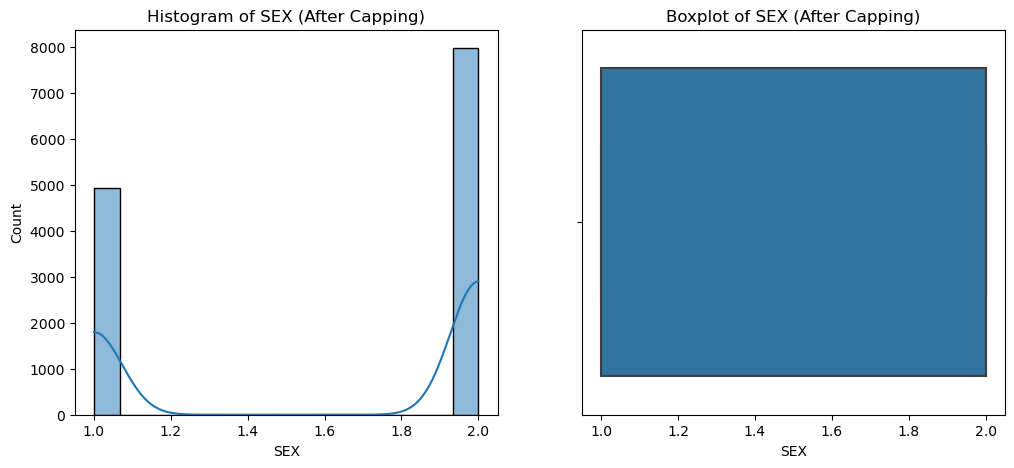

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


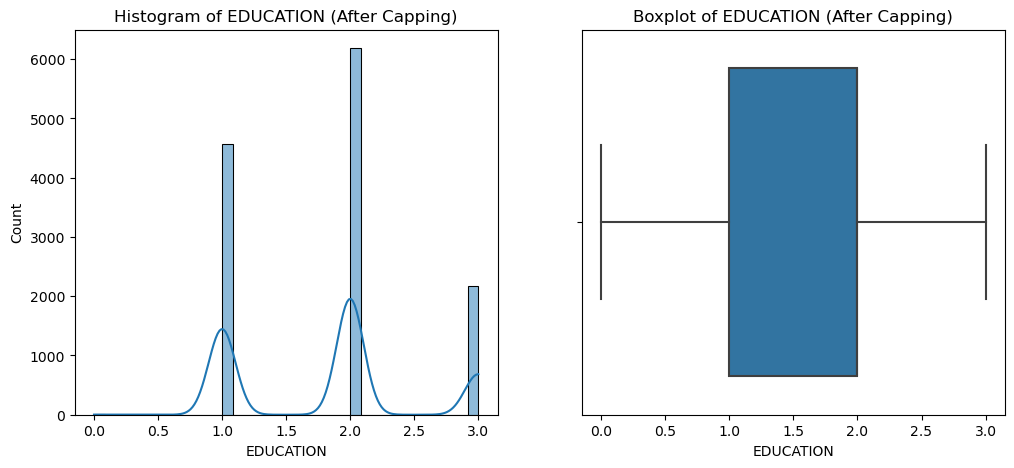

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


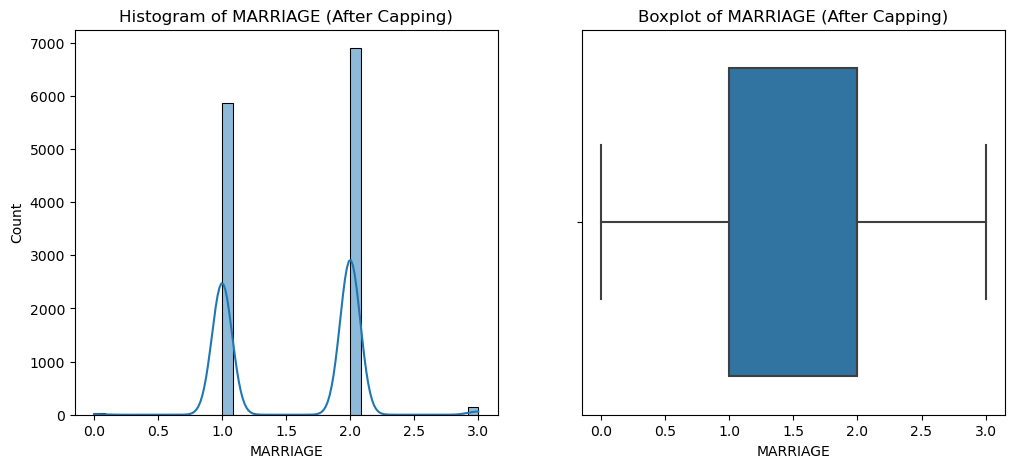

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


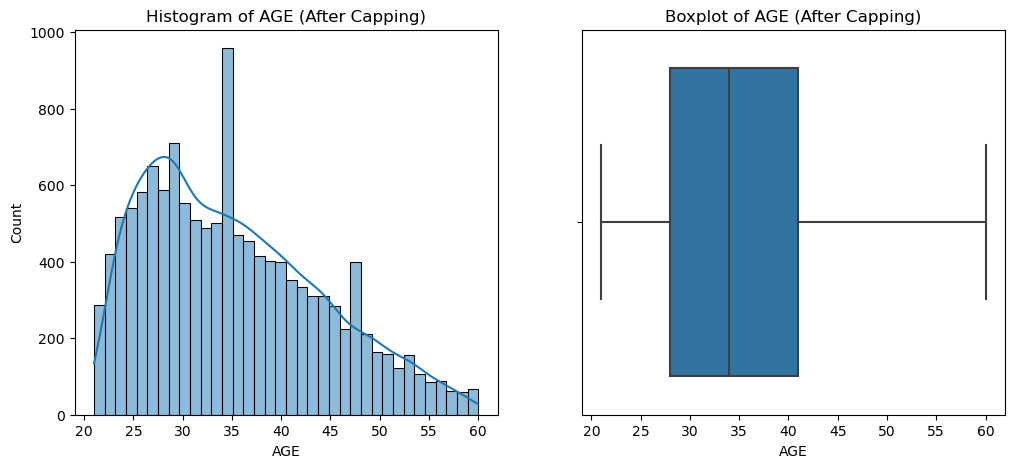

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


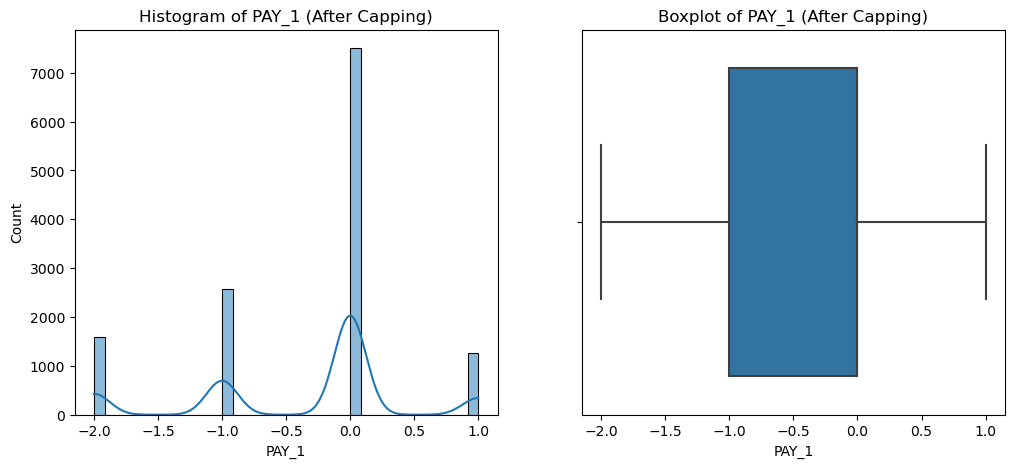

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


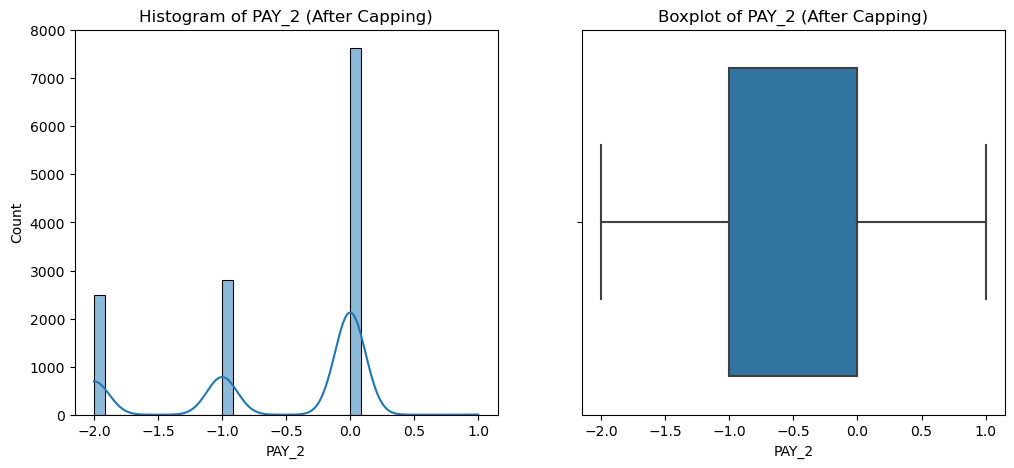

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


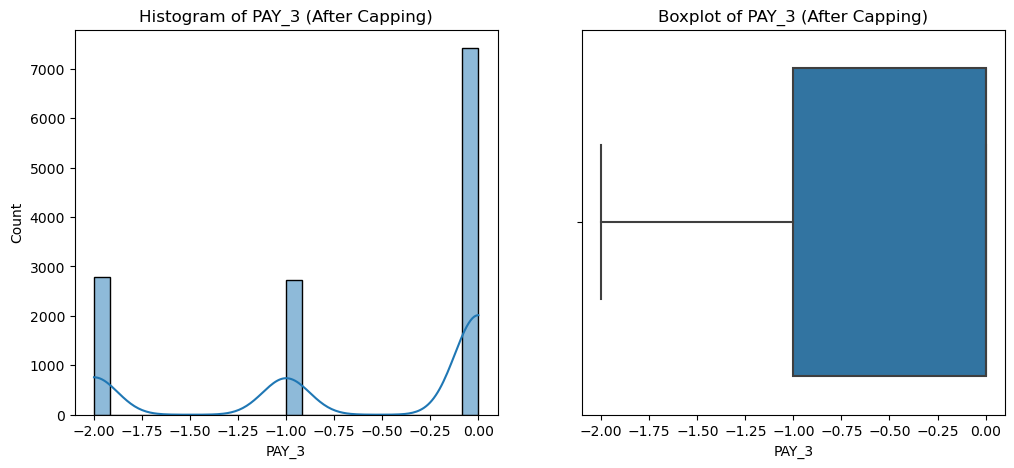

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


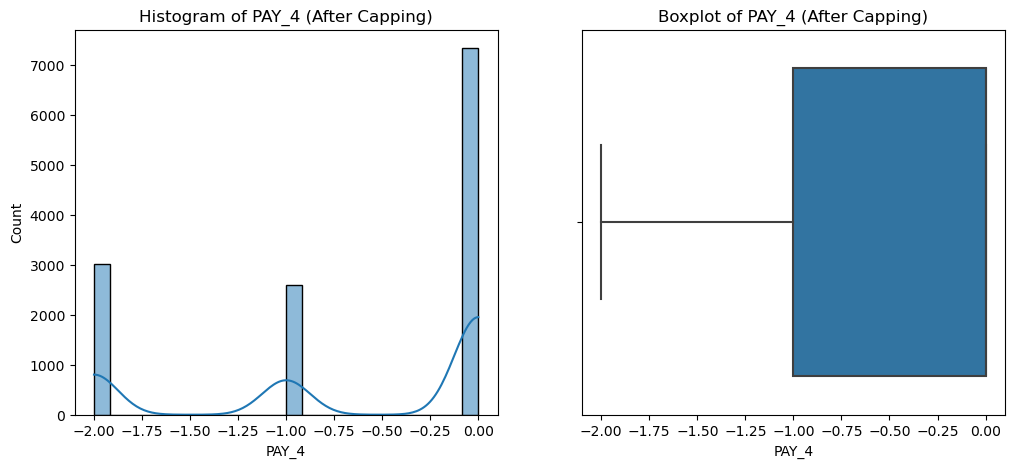

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


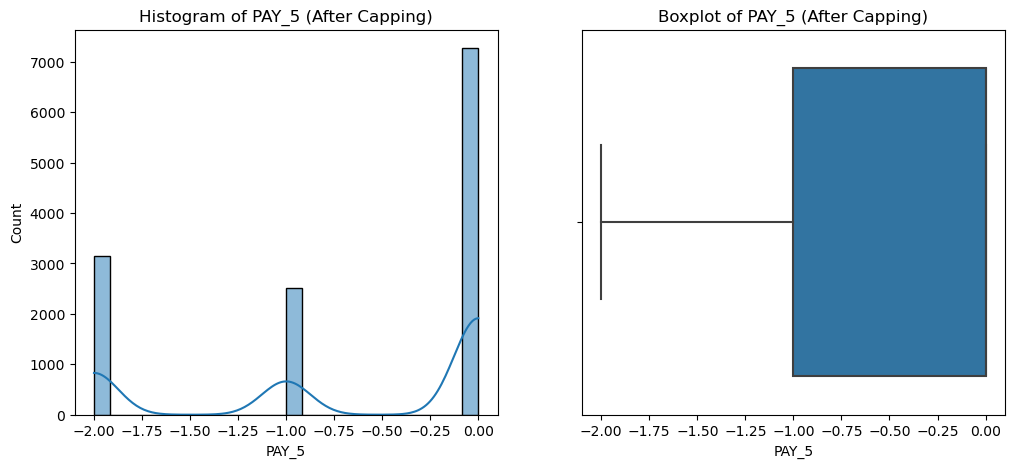

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


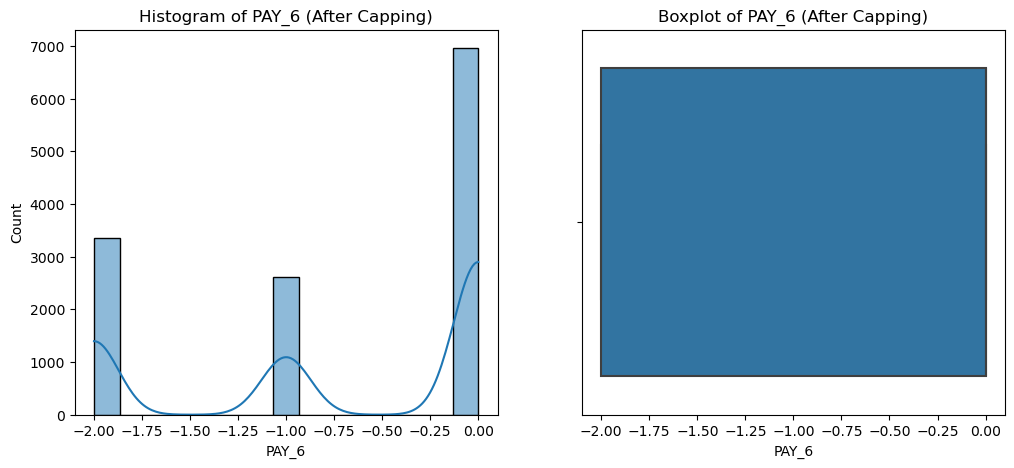

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


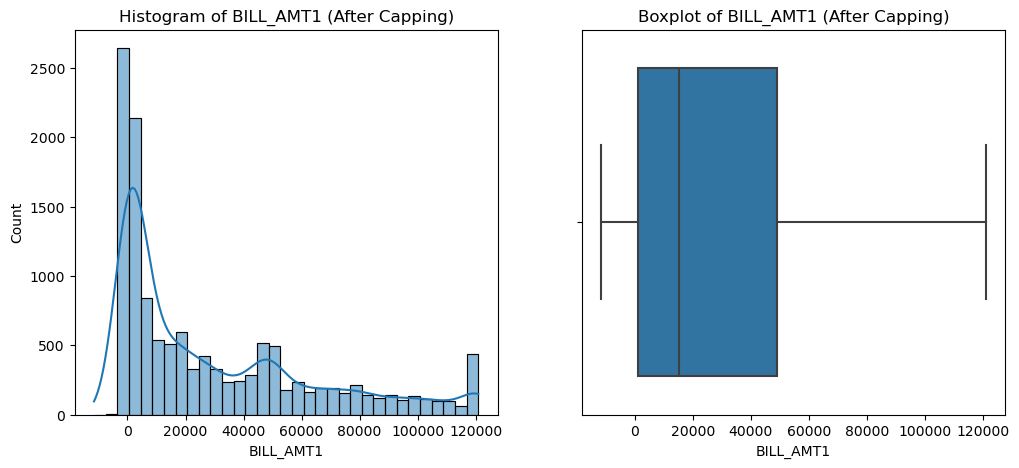

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


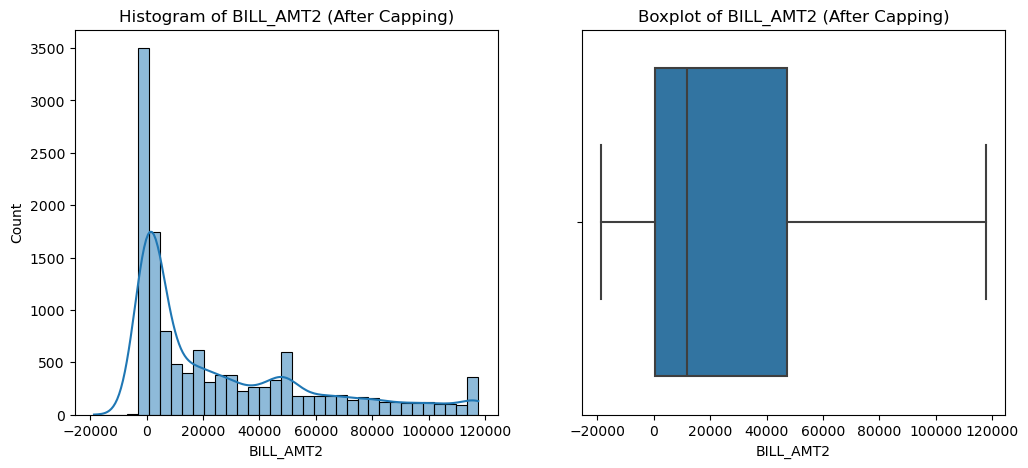

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


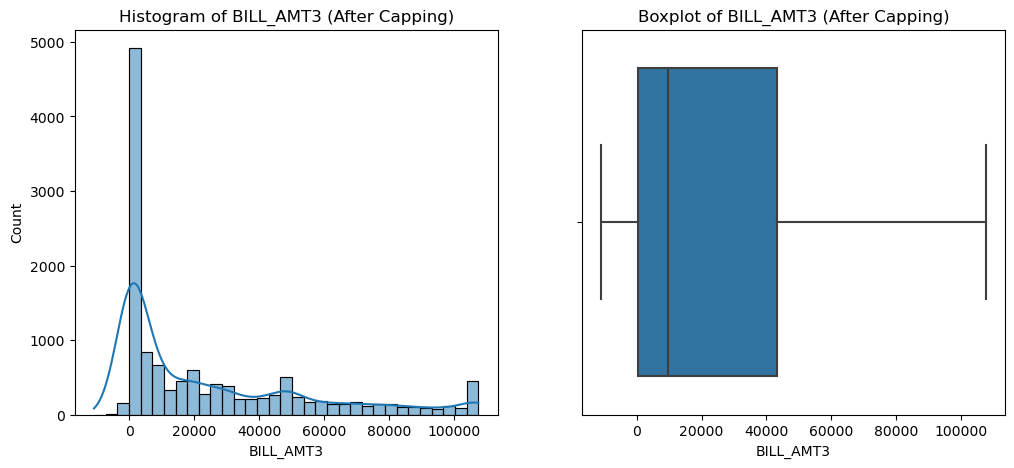

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


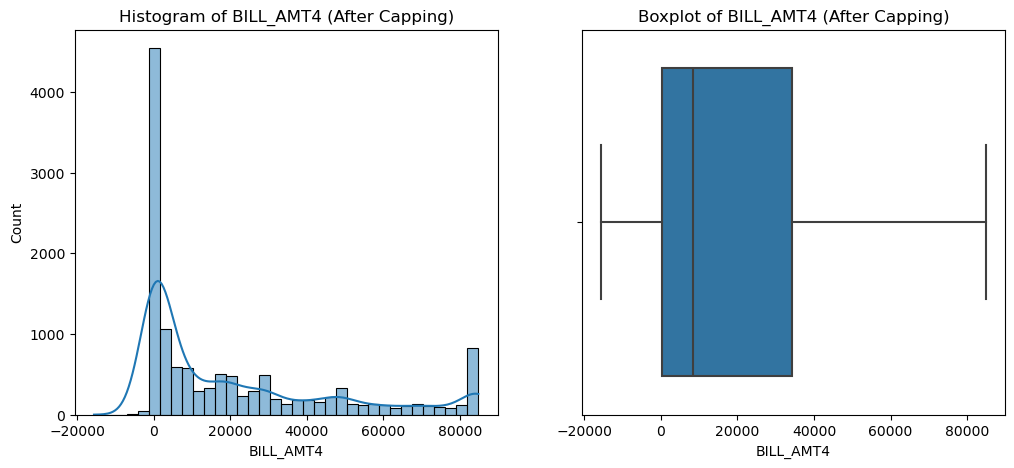

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


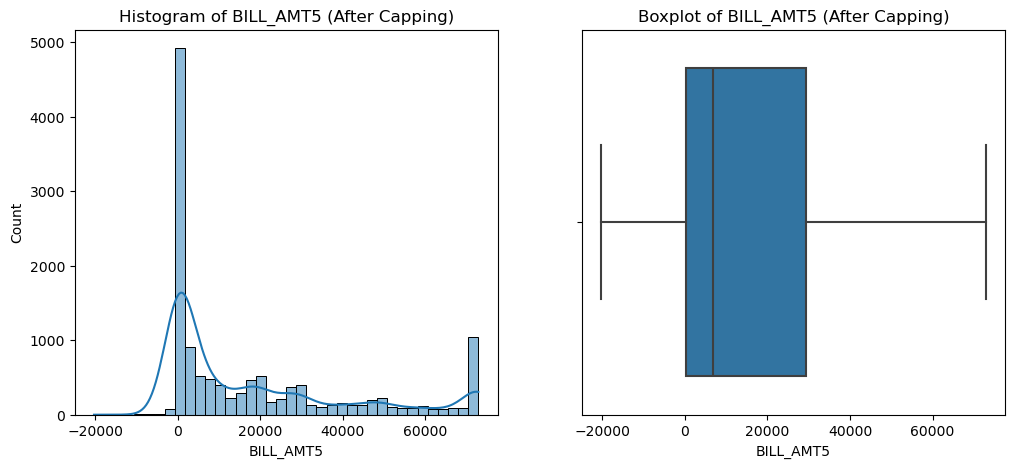

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


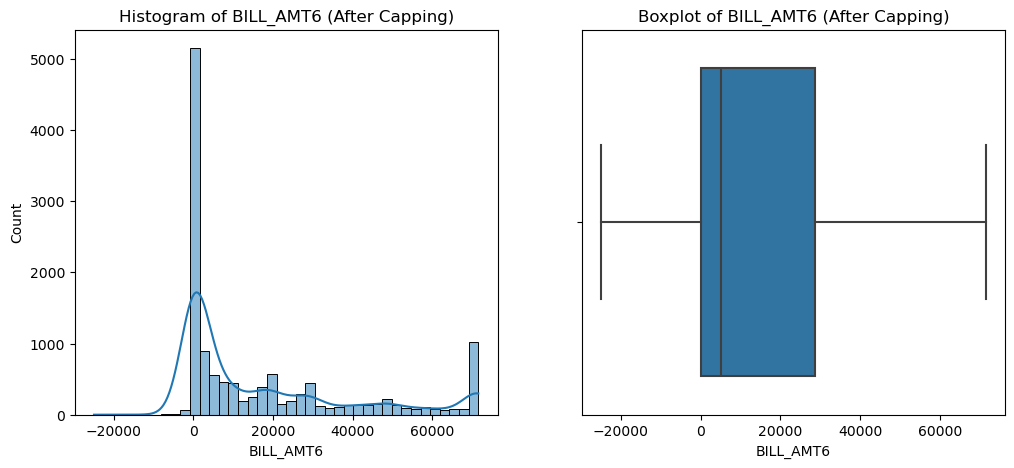

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


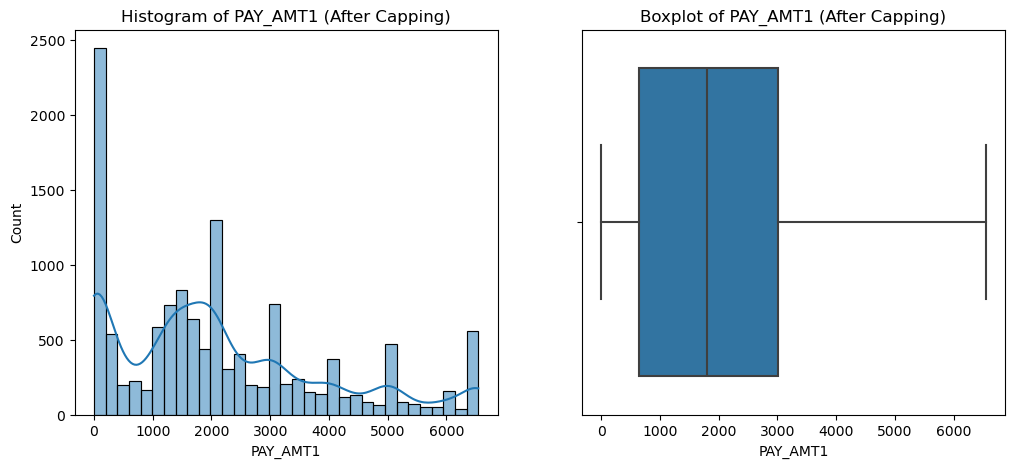

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


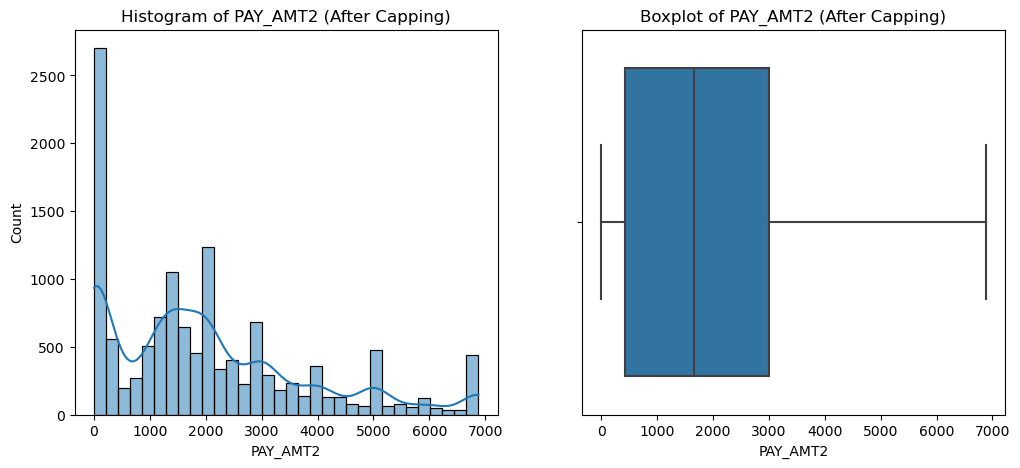

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


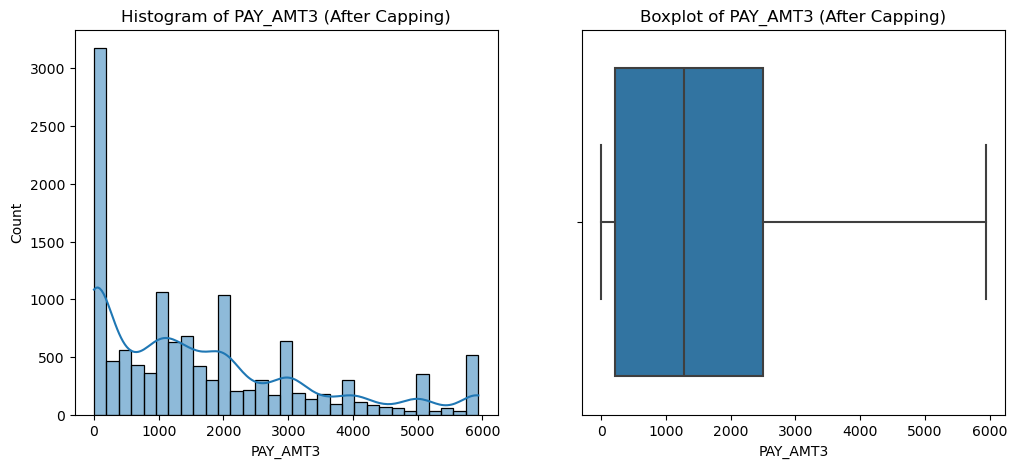

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


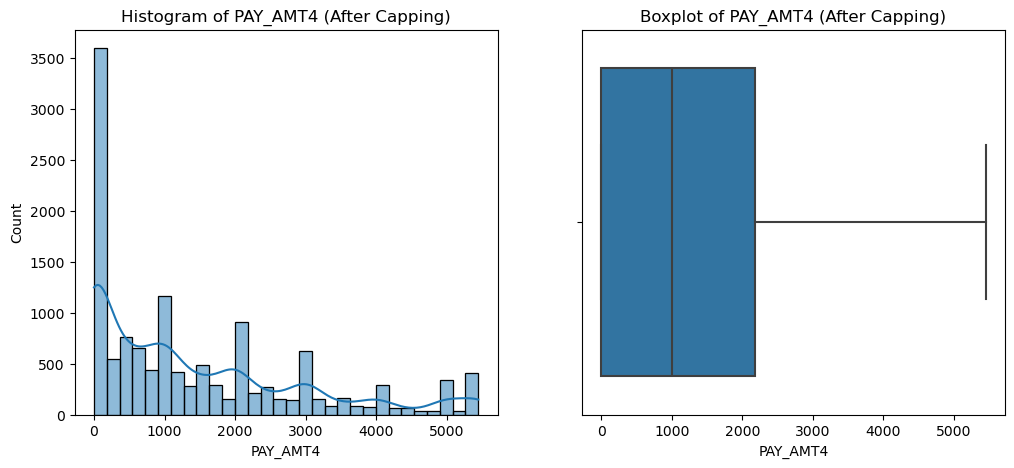

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


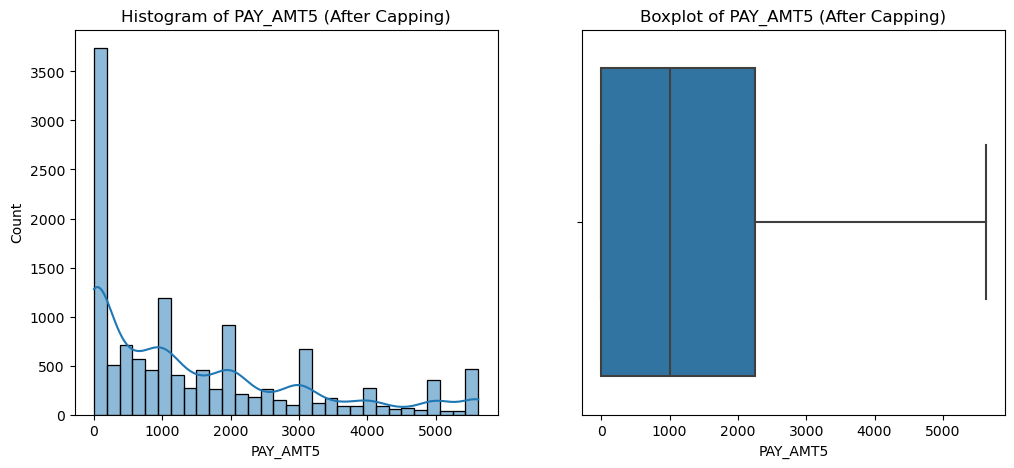

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


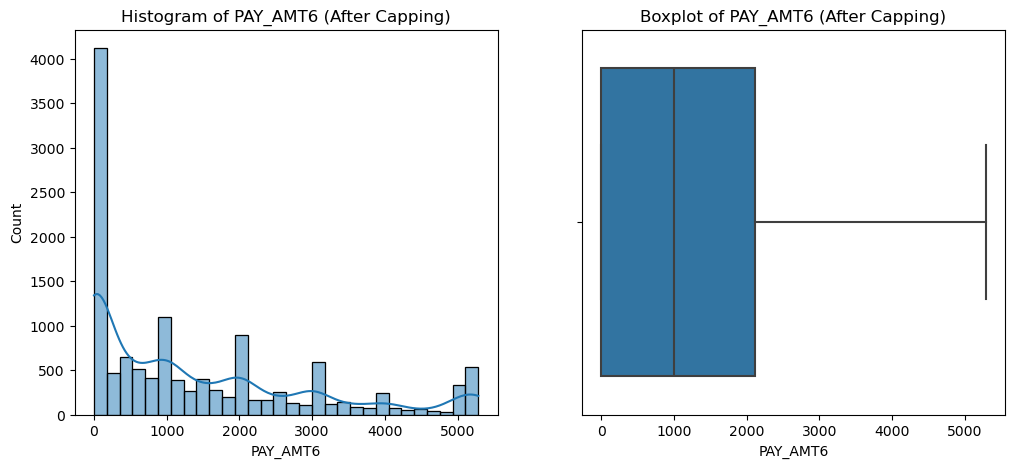

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


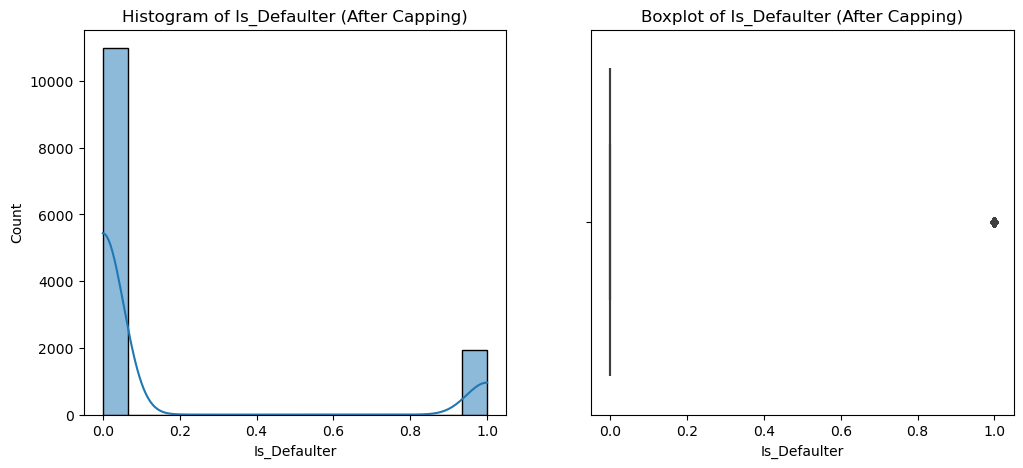

In [98]:
# Visualize the data after removing outliers
for column in dff_cap:
    plt.figure(figsize=(12, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dff_cap[column], kde=True)
    plt.title(f'Histogram of {column} (After Capping)')
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dff_cap[column])
    plt.title(f'Boxplot of {column} (After Capping)')
    plt.show()

<Axes: >

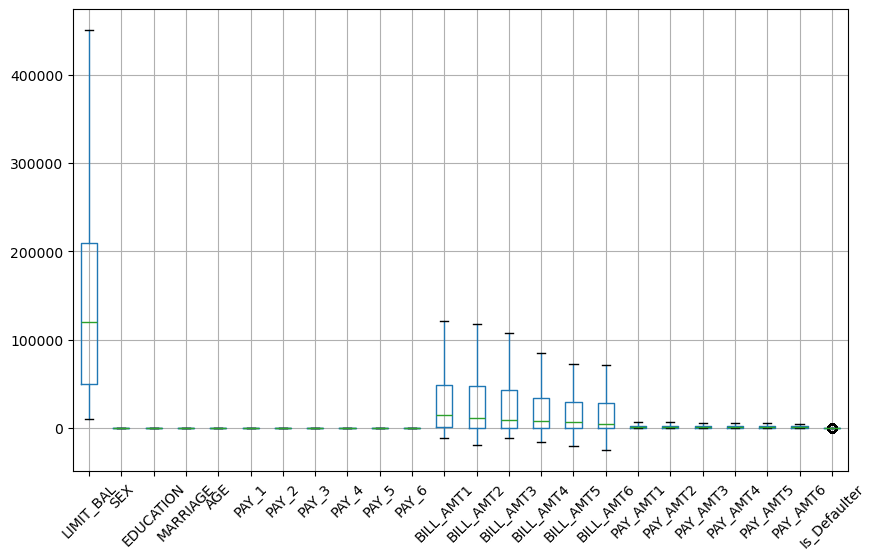

In [68]:
dff_cap.boxplot(figsize = (10,6),rot = 45)

In [100]:
dff_cap.skew()

LIMIT_BAL       0.894500
SEX            -0.483218
EDUCATION       0.265633
MARRIAGE       -0.026143
AGE             0.595217
PAY_1          -0.636270
PAY_2          -0.826720
PAY_3          -0.740238
PAY_4          -0.687889
PAY_5          -0.654950
PAY_6          -0.565359
BILL_AMT1       1.147636
BILL_AMT2       1.206980
BILL_AMT3       1.245645
BILL_AMT4       1.188324
BILL_AMT5       1.180819
BILL_AMT6       1.228757
PAY_AMT1        0.821728
PAY_AMT2        0.953627
PAY_AMT3        1.012001
PAY_AMT4        1.086350
PAY_AMT5        1.095687
PAY_AMT6        1.086505
Is_Defaulter    1.960577
dtype: float64

***After applying the Capping Method the remaining outliers are removed***

In [102]:
#checking Correlation
cr = dff_cap.corr()
cr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
LIMIT_BAL,1.000000,0.050938,-0.246288,-0.118085,0.123860,-0.238960,-0.377938,-0.361344,-0.337230,-0.316679,-0.296602,-0.107001,-0.115997,-0.110753,-0.102365,-0.095139,-0.090248,0.006840,0.021031,0.043247,0.072046,0.074244,0.090012,-0.019274
SEX,0.050938,1.000000,0.005726,-0.040202,-0.085806,-0.037199,-0.066312,-0.062207,-0.047936,-0.038858,-0.030057,-0.017794,-0.017303,-0.005280,0.004352,0.010110,0.015552,-0.013937,0.007641,0.026436,0.031188,0.028488,0.045598,-0.035991
EDUCATION,-0.246288,0.005726,1.000000,-0.166801,0.212739,0.087872,0.189512,0.183786,0.170791,0.161373,0.154578,0.118096,0.115761,0.111971,0.102324,0.094092,0.096492,0.032914,0.020038,0.022969,0.009666,0.003896,-0.003010,0.007754
MARRIAGE,-0.118085,-0.040202,-0.166801,1.000000,-0.421035,0.043836,0.067720,0.067974,0.070404,0.070572,0.068076,0.029696,0.028932,0.029489,0.027482,0.026632,0.024658,0.026126,0.014851,0.009177,0.006006,0.005790,0.000420,-0.023567
AGE,0.123860,-0.085806,0.212739,-0.421035,1.000000,-0.052158,-0.078426,-0.073942,-0.071560,-0.071122,-0.061648,-0.005392,-0.003228,-0.006981,-0.017063,-0.019179,-0.010520,-0.027587,-0.013888,-0.019567,-0.008170,0.000189,-0.004810,0.030829
PAY_1,-0.238960,-0.037199,0.087872,0.043836,-0.052158,1.000000,0.430928,0.432760,0.408178,0.389126,0.374470,0.296331,0.299062,0.291849,0.291730,0.286511,0.277345,0.076468,0.063066,0.060631,0.049680,0.057787,0.039876,0.014115
PAY_2,-0.377938,-0.066312,0.189512,0.067720,-0.078426,0.430928,1.000000,0.905435,0.827483,0.777103,0.739822,0.596063,0.590067,0.573730,0.570246,0.560390,0.539791,0.409498,0.354449,0.307265,0.283428,0.268448,0.252778,-0.117844
PAY_3,-0.361344,-0.062207,0.183786,0.067974,-0.073942,0.432760,0.905435,1.000000,0.904197,0.834005,0.791069,0.578074,0.612041,0.601411,0.597013,0.586191,0.564519,0.463070,0.414888,0.341507,0.314541,0.300315,0.279579,-0.112459
PAY_4,-0.337230,-0.047936,0.170791,0.070404,-0.071560,0.408178,0.827483,0.904197,1.000000,0.909722,0.838494,0.546764,0.583920,0.609333,0.611285,0.598571,0.576420,0.406306,0.466244,0.374944,0.329662,0.326204,0.299593,-0.108763
PAY_5,-0.316679,-0.038858,0.161373,0.070572,-0.071122,0.389126,0.777103,0.834005,0.909722,1.000000,0.904427,0.518748,0.556568,0.585426,0.616275,0.610096,0.585961,0.382009,0.423719,0.432445,0.352280,0.342153,0.318794,-0.112067


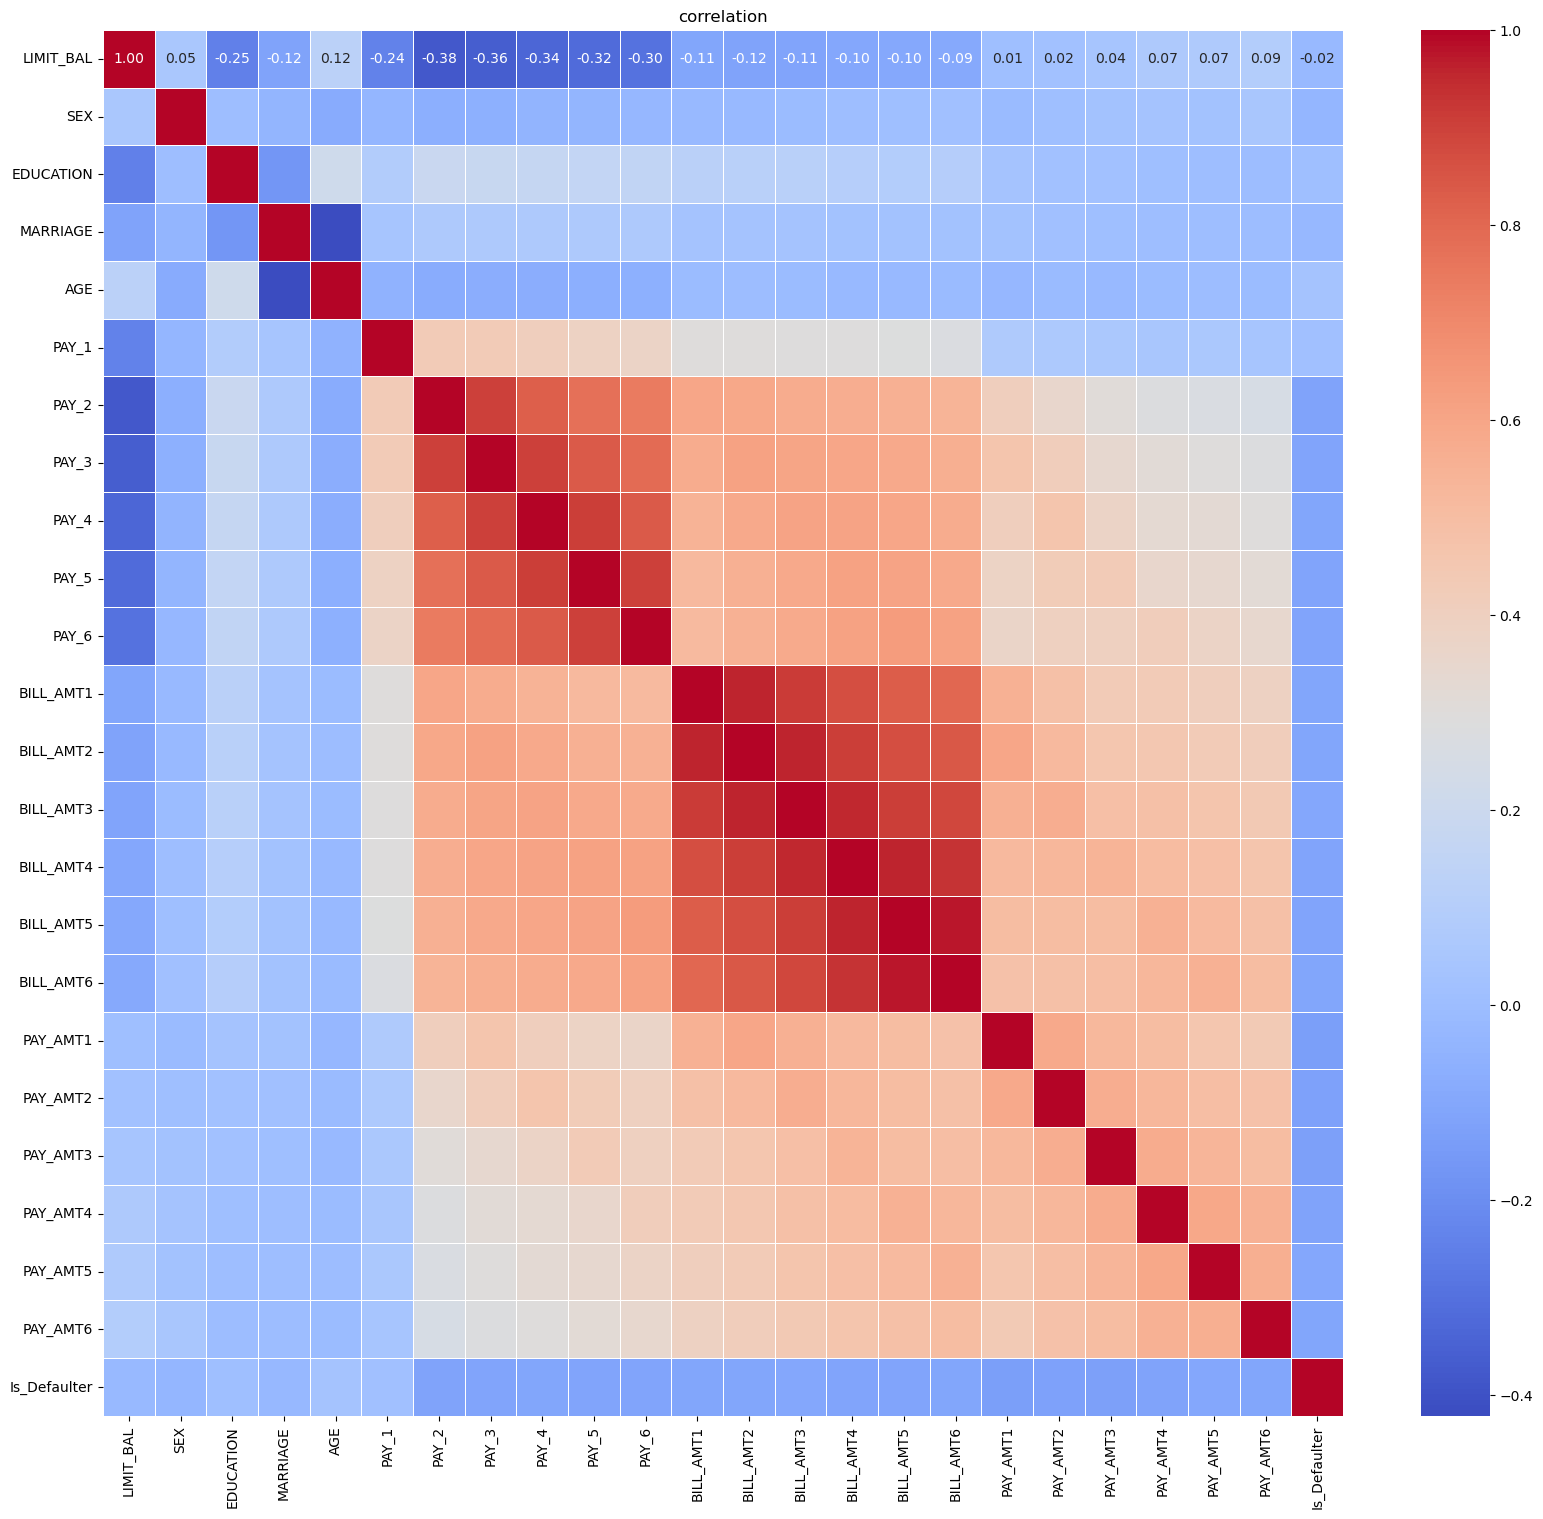

In [104]:
#Visualizing the correlation using a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(cr,annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('correlation')
plt.show()

#### Results

The heatmap visualizes the correlation matrix of the dataset's numerical features.

* Darker red shades indicate a strong positive correlation.
* Darker blue shades represent a strong negative correlation.
* Lighter or white shades suggest little to no correlation.

In [106]:
#checking for replaced labels
dff_cap.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
2,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948,15549.0,1518.0,1500,1000.0,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959,29547.0,2000.0,2019,1200.0,1100,1069,1000,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619,20024.0,2500.0,1815,657.0,1000,1000,800,0
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159,567.0,380.0,601,0.0,581,1687,1542,0
14,250000,1,1,2,29,0,0,0,0,0,0,70887.0,67060.0,63561.0,59696.0,56875,55512.0,3000.0,3000,3000.0,3000,3000,3000,0


In [108]:
#Value counts of Is_defaulter
dff_cap['Is_Defaulter'].value_counts()

Is_Defaulter
0    10993
1     1940
Name: count, dtype: int64

<Axes: xlabel='Is_Defaulter', ylabel='count'>

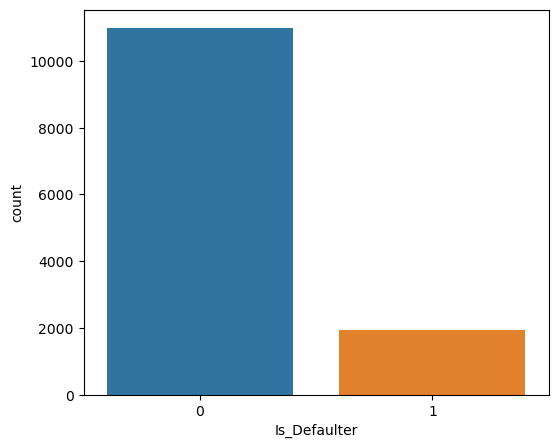

In [110]:
#value count plot for IsDefaulter
plt.figure(figsize=(6,5))
sns.countplot(x = 'Is_Defaulter', data = dff_cap)

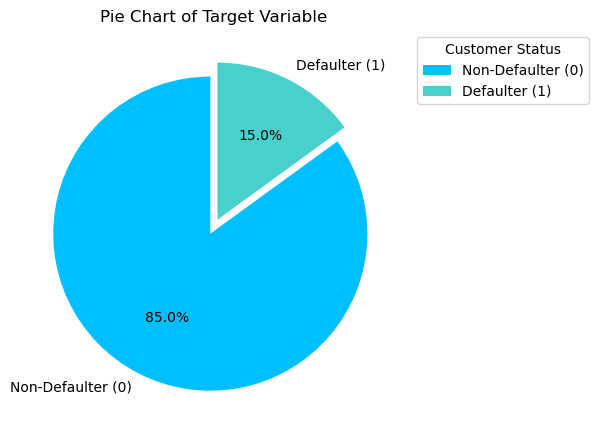

In [277]:
# Count values for Is_Defaulter
counts = dff_cap['Is_Defaulter'].value_counts()

# Define labels and colors
labels = ["Non-Defaulter (0)", "Defaulter (1)"]
colors = ['deepskyblue', 'mediumturquoise']

# Plot Pie Chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=[0.05, 0.05])

# Add legend outside the plot
plt.legend(labels, loc="upper left", bbox_to_anchor=(1, 1), title="Customer Status")

# Add title
plt.title("Pie Chart of Target Variable")

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


##### Here we can see defaulters are less as compare to Non defaulter in the given dataset, So we can say that we have imbalanced dataset

### Balancing Imbalanced Data

The target variable **Is_Defaulter** has significant class imbalance, we will apply the *SMOTE (Synthetic Minority Oversampling Technique)*

**SMOTE** is an oversampling technique used to handle imbalanced datasets by generating synthetic samples for the minority class instead of duplicating existing ones.

**Key Features :**
* Reduces overfitting compared to random oversampling.
* Improves classification performance on imbalanced datasets.
* Commonly used in fraud detection, medical diagnosis, and NLP tasks.


In [112]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

X = dff_cap.drop('Is_Defaulter', axis=1) # features excluding the target
y = dff_cap['Is_Defaulter'] # Target Column

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns = X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns =['Is_Defaulter'])

df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

print(df_resampled['Is_Defaulter'].value_counts())

Is_Defaulter
0    10993
1    10993
Name: count, dtype: int64


##### **now the target column is balanced**

In [114]:
df_resampled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
0,90000,2,2,2,34,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948,15549.000000,1518.000000,1500,1000.000000,1000,1000,5000,0
1,50000,2,2,1,37,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959,29547.000000,2000.000000,2019,1200.000000,1100,1069,1000,0
2,50000,1,1,2,37,0,0,0,0,0,0,64400.000000,57069.000000,57608.000000,19394.000000,19619,20024.000000,2500.000000,1815,657.000000,1000,1000,800,0
3,100000,2,2,2,23,0,-1,-1,0,0,-1,11876.000000,380.000000,601.000000,221.000000,-159,567.000000,380.000000,601,0.000000,581,1687,1542,0
4,250000,1,1,2,29,0,0,0,0,0,0,70887.000000,67060.000000,63561.000000,59696.000000,56875,55512.000000,3000.000000,3000,3000.000000,3000,3000,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21981,200000,1,1,1,36,-1,-2,-2,-2,-2,-2,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0,0,0,1
21982,50000,2,1,2,23,-1,-1,-1,0,-1,-1,1112.651931,908.287399,4332.244619,2582.238988,3076,3165.726053,908.287399,4332,1000.596109,3077,3195,3525,1
21983,360000,1,1,1,49,0,-2,-2,-2,-2,-2,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0,0,0,1
21984,160000,2,2,1,34,0,0,0,0,0,0,4188.169695,4467.335547,6647.485219,5893.666962,6262,5720.649157,1793.060637,3390,2197.480214,1667,605,302,1


In [116]:
# Print the resampled data shape
print("\nResampled Data Shape:")
print( df_resampled.shape)


Resampled Data Shape:
(21986, 24)


## **Split Data into Training and Testing Sets**

In [118]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [120]:
 #Print the shape of the training and testing data
print("Training Data Shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting Data Shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training Data Shape:
X_train: (17588, 23)
y_train: (17588,)

Testing Data Shape:
X_test: (4398, 23)
y_test: (4398,)


## **Feature Selection**

**Feature selection** is the process of choosing the most relevant features from a dataset to improve model performance, reduce overfitting, and enhance interpretability. It helps in dimensionality reduction, making models more efficient and faster.

**1. SelectKBest:** 
SelectKBest is a feature selection method in scikit-learn that selects the top k features based on their scores using a specified statistical test. It helps improve model performance by removing irrelevant features.

2. **mutual_info_classif:**
mutual_info_classif is a scoring function that measures the mutual information (MI) between each feature and the target variable. It captures non-linear relationships, making it useful for classification tasks.

In [122]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Calculate mutual information scores
selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X_train, y_train)

# Get mutual information scores
mutual_info_scores = selector.scores_

# Print mutual information scores
print("Mutual Information Scores:")
for feature, score in zip(X_train.columns, mutual_info_scores):
    print(f"{feature}: {score:.3f}")

# Sort mutual information scores in descending order
sorted_scores = sorted(zip(X_train.columns, mutual_info_scores), key=lambda x: x[1], reverse=True)

# Select top 12 features
top_12_features = [feature for feature, score in sorted_scores[:12]]

print("\nTop 12 Features:")
print(top_12_features)

Mutual Information Scores:
LIMIT_BAL: 0.050
SEX: 0.030
EDUCATION: 0.023
MARRIAGE: 0.034
AGE: 0.014
PAY_1: 0.006
PAY_2: 0.006
PAY_3: 0.016
PAY_4: 0.012
PAY_5: 0.006
PAY_6: 0.011
BILL_AMT1: 0.048
BILL_AMT2: 0.053
BILL_AMT3: 0.047
BILL_AMT4: 0.044
BILL_AMT5: 0.050
BILL_AMT6: 0.038
PAY_AMT1: 0.101
PAY_AMT2: 0.093
PAY_AMT3: 0.100
PAY_AMT4: 0.082
PAY_AMT5: 0.084
PAY_AMT6: 0.088

Top 12 Features:
['PAY_AMT1', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'BILL_AMT2', 'LIMIT_BAL', 'BILL_AMT5', 'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT4']


### Insights

*From the mutual information scores:*

* LIMIT_BAL, SEX, EDUCATION and MARRIAGE are strongly dependent on the target variable.
* AGE, PAY_1 and PAY_2 have moderate dependence.


The top 12 features selected are likely to be the most informative for predicting the target variable.

## **Feature Scaling**

Feature Scaling is a technique used to normalize or standardize numerical data, ensuring all features have a similar range. Common methods include Min-Max Scaling (scales values between 0 and 1) and Standardization (converts data to have a mean of 0 and a standard deviation of 1).

In [124]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame for preview
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display first 5 rows
print("Scaled Training Data Preview:")
display(X_train_scaled_df.head())

print("Scaled Testing Data Preview:")
display(X_test_scaled_df.head())

Scaled Training Data Preview:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.296735,0.992636,-1.066678,-0.853821,1.395839,1.690133,-1.698042,-0.381342,-0.351169,-1.528311,-1.483128,-0.770339,-0.746845,-0.620045,-0.725879,-0.716418,-0.698000,-1.076829,0.918561,-0.940256,-0.877208,-0.872672,-0.847758
1,0.207329,-1.007419,0.444943,-0.853821,1.277086,0.392901,0.829049,0.856347,0.858932,0.869756,0.912322,2.066632,2.043153,2.229397,2.586254,2.394603,2.124106,1.445121,0.919741,1.054086,0.974047,0.890247,2.539950
2,1.069345,-1.007419,0.444943,-0.853821,-0.147956,-0.904330,-0.434497,-0.381342,-0.351169,-0.329277,-0.285403,-0.758328,-0.697983,-0.721776,-0.720271,-0.705153,-0.691493,-0.166191,-0.881288,-0.846759,-0.697067,-0.776389,-0.554993
3,-0.686731,0.992636,-1.066678,1.100500,-1.335490,-0.904330,0.829049,0.856347,0.858932,0.869756,0.912322,0.069683,-0.193355,-0.106246,0.058898,0.136106,0.169220,0.096171,0.734445,1.021392,0.546834,0.483420,1.709055
4,-0.865543,-1.007419,0.444943,-0.853821,0.683318,0.392901,0.829049,0.856347,0.858932,0.869756,0.912322,0.667815,0.772680,0.259383,0.063563,0.136284,0.080910,0.670252,-0.096436,0.398664,0.526185,-0.199372,1.887502


Scaled Testing Data Preview:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.133761,0.992636,0.444943,-0.853821,-0.860476,-0.904330,-0.434497,0.856347,0.858932,0.869756,0.912322,-0.727367,-0.431252,-0.227612,-0.098756,0.104716,0.158798,2.760347,3.021729,0.072609,1.258855,-0.337016,-0.150699
1,-0.597325,-1.007419,1.956565,-0.853821,0.802072,-2.201561,-1.698042,-1.619030,-1.561270,-1.528311,-1.483128,-0.817560,-0.941834,-1.096337,-1.337198,-1.618232,-1.832085,1.659780,1.717576,2.110761,2.445083,-0.692312,-0.847758
2,-0.776137,-1.007419,0.444943,-0.853821,-0.029202,0.392901,0.829049,0.856347,0.858932,0.869756,0.912322,0.055645,0.095771,0.182908,0.255643,0.379080,0.411090,-0.227238,-0.065750,-0.042799,-0.165187,-0.188524,0.488504
3,-0.418513,0.992636,-1.066678,-0.853821,0.327058,0.392901,0.829049,0.856347,0.858932,0.869756,0.912322,1.227867,1.394729,1.450693,1.185492,1.555258,1.666103,1.855671,0.401621,1.021392,1.258855,0.483420,1.243419
4,-0.865543,-1.007419,1.956565,-0.853821,2.820880,0.392901,0.829049,-1.619030,-1.561270,-1.528311,-1.483128,0.768161,-0.746470,-0.730562,-0.725879,-0.716418,-0.698000,-1.076829,-1.035898,-0.940256,-0.877208,-0.872672,-0.847758


## **Machine Learning Model Building**

#### Models

* **Logistic Regression**: Logistic Regression is a classification algorithm that predicts probabilities using the sigmoid function, making it ideal for binary classification tasks.

* **Support Vector Machine(SVM)**: Support Vector Machine (SVM) is a classification algorithm that finds the optimal hyperplane to separate classes, maximizing the margin between them for better generalization.

* **Random Forest**: Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their outputs for more accurate and robust predictions, reducing overfitting.

* **Decision Tre**: Decision Tree is a supervised learning algorithm that splits data into branches based on feature conditions, forming a tree-like structure to make predictions.

* **K-Nearest Neighbors**: K-Nearest Neighbors (KNN) is a simple, non-parametric algorithm that classifies data points based on the majority class of their K closest neighbors.

* **Gradient Boosting**: Gradient Boosting is an ensemble method that combines multiple weak learners to form a strong predictive model. It efficiently captures complex feature interactions and handles large datasets but can be computationally intensive.

In [126]:
#importing required libraries for the model implementation
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [128]:
#Select top 12 features 
selector = SelectKBest(mutual_info_classif, k=12)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [129]:
# Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [132]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"{model_name}:")
    print(f"Training Accuracy: {train_accuracy:.3f}")
    print(f"Testing Accuracy: {test_accuracy:.3f}")
    print()

C:\Users\Sooraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Training Accuracy: 0.584
Testing Accuracy: 0.579

Support Vector Machine:
Training Accuracy: 0.614
Testing Accuracy: 0.622

Random Forest:
Training Accuracy: 0.978
Testing Accuracy: 0.849

Decision Tree:
Training Accuracy: 0.978
Testing Accuracy: 0.739

K-Nearest Neighbors:
Training Accuracy: 0.832
Testing Accuracy: 0.751

Gradient Boosting:
Training Accuracy: 0.742
Testing Accuracy: 0.720



### Model Performance Comparison

This study evaluates the performance of six machine learning models on a classification task, assessing them based on their training and testing accuracy.

#### Models and Performance

In [134]:
data = {'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Gradient Boosting'],
        'Training Accuracy': [0.584, 0.614, 0.978, 0.978,0.832,0.742],
        'Testing Accuracy': [0.579, 0.622, 0.846, 0.741, 0.751, 0.720 ]}

df_data = pd.DataFrame(data)
df_data

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.584,0.579
1,Support Vector Machine,0.614,0.622
2,Random Forest,0.978,0.846
3,Decision Tree,0.978,0.741
4,K-Nearest Neighbors,0.832,0.751
5,Gradient Boosting,0.742,0.720


### Insights

**1.Random Forest and Decision Tree**  – Both models shows high training accuracy (0.978) but have significantly lower testing accuracy (0.846 and 0.741, respectively), indicating overfitting. Random Forest generalizes better than Decision Tree but still has a significant drop in performance.

**2.Support Vector Machine (SVM)** - The model performs consistently, with a slight improvement in testing accuracy (0.622) over training (0.614), suggesting a well-generalized model.

**3.K-Nearest Neighbors** – It shows moderate overfitting, with a decent drop from training (0.832) to testing (0.751).

**4.Gradient Boosting** – It has balanced performance (training: 0.742, testing: 0.720), indicating good generalization. However, it does not outperform other models significantly.

**5.Logistic Regression** – The model performs the worst (training: 0.584, testing: 0.579), suggesting it may not be the best fit for this dataset.

### Regularization

* Regularization is a technique in machine learning used to prevent overfitting by adding a penalty to the loss function. This ensures that the model generalizes well to unseen data. Examples for common types of regularization: L1 (Lasso) and L2 (Ridge).


* Here we applying regularization techniques to all models to prevent overfitting.

In [136]:
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500),
    "Support Vector Machine": SVC(kernel='linear', C=0.1),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=10),
    "Decision Tree": DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_split=10),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05)
}

# Apply regularization and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Printing the results
    print(f"{model_name}:")
    print(f"Train_Accuracy: {train_accuracy}")
    print(f"Test_Accuracy: {test_accuracy}")
    print()

C:\Users\Sooraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Train_Accuracy: 0.6183193086195133
Test_Accuracy: 0.6139154160982264

Support Vector Machine:
Train_Accuracy: 0.614623607004776
Test_Accuracy: 0.6139154160982264

Random Forest:
Train_Accuracy: 0.851830793722993
Test_Accuracy: 0.7803547066848567

Decision Tree:
Train_Accuracy: 0.7221400955196725
Test_Accuracy: 0.7007730786721237

K-Nearest Neighbors:
Train_Accuracy: 0.7953149874914714
Test_Accuracy: 0.7312414733969986

Gradient Boosting:
Train_Accuracy: 0.7751876279281328
Test_Accuracy: 0.7526148249204184



#### Explanations

**1. Logistic Regression:**

* Uses L2 regularization (ridge penalty).
* Optimized with the 'lbfgs' solver.
* Maximum of 500 iterations.

**2. Support Vector Machine (SVC):**
* Uses a linear kernel.
* Regularization parameter C=0.1

**3. Random Forest Classifier:**
* Uses 50 decision trees.
* Features are chosen using the square root of the total feature count.
* Maximum tree depth is 10.

**4. Decision Tree Classifier:**
* Uses cost-complexity pruning with alpha=0.001
* Maximum depth of 10.
* Requires at least 10 samples to split a node.

**5. K-Nearest Neighbors (KNN):**

* Uses 10 neighbors for classification.

**6. Gradient Boosting Classifier:**

* Uses 200 trees.
* Learning rate of 0.05.


### Model Performance Comparison

In [138]:
new_data = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 
              'Decision Tree', 'K-Nearest Neighbors', 'Gradient Boosting'],
    'Previous Training Accuracy': [0.584, 0.614, 0.978, 0.978,0.832,0.742],
    'Regularized Training Accuracy': [0.6183193086195133, 0.614623607004776, 0.8566067773481919, 
                                      0.7221400955196725, 0.7953149874914714, 0.7751876279281328],
    'Previous Testing Accuracy': [0.579, 0.622, 0.846, 0.741, 0.751, 0.720 ],
    'Regularized Testing Accuracy': [0.6139154160982264, 0.6139154160982264, 0.7762619372442019,  
                                     0.7007730786721237, 0.7312414733969986, 0.7526148249204184]
}
df_new_data = pd.DataFrame(new_data)
df_new_data

,Model,Previous Training Accuracy,Regularized Training Accuracy,Previous Testing Accuracy,Regularized Testing Accuracy
0,Logistic Regression,0.584,0.618319,0.579,0.613915
1,Support Vector Machine,0.614,0.614624,0.622,0.613915
2,Random Forest,0.978,0.856607,0.846,0.776262
3,Decision Tree,0.978,0.722140,0.741,0.700773
4,K-Nearest Neighbors,0.832,0.795315,0.751,0.731241
5,Gradient Boosting,0.742,0.775188,0.720,0.752615


### Insights

* Regularization reduced overfitting in Decision Tree and Random Forest, as their training accuracy dropped significantly (from 0.978 to 0.722 and 0.856, respectively), while test accuracy remained closer (0.741 to 0.700 and 0.846 → 0.776). Regularization helped improve generalization by preventing the models from memorizing the training data.

* Slight drop in Support Vector Machine's testing accuracy (0.622 to 0.613), suggesting potential underfitting.

* Logistic Regression, KNN, and Gradient Boosting achieve a more stable performance, showing that regularization effectively balanced bias and variance.

## **Model Evaluation : Classification Matrics**

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

C:\Users\Sooraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.6139154160982264
Precision: 0.6097145291861952
Recall: 0.6466335291459557
F1-score: 0.6276315789473684
Confusion Matrix:
[[1269  916]
 [ 782 1431]]

Support Vector Machine:
Accuracy: 0.6139154160982264
Precision: 0.6086039645719106
Recall: 0.6520560325350203
F1-score: 0.6295811518324608
Confusion Matrix:
[[1257  928]
 [ 770 1443]]

Random Forest:
Accuracy: 0.7778535698044565
Precision: 0.7788808664259927
Recall: 0.7799367374604609
F1-score: 0.7794084443440957
Confusion Matrix:
[[1695  490]
 [ 487 1726]]

Decision Tree:
Accuracy: 0.7007730786721237
Precision: 0.6967968407196139
Recall: 0.7175779484862178
F1-score: 0.7070347284060552
Confusion Matrix:
[[1494  691]
 [ 625 1588]]

K-Nearest Neighbors:
Accuracy: 0.7312414733969986
Precision: 0.6951912154486937
Recall: 0.8296430185268866
F1-score: 0.7564894932014833
Confusion Matrix:
[[1380  805]
 [ 377 1836]]

Gradient Boosting:
Accuracy: 0.7526148249204184
Precision: 0.7537212449255751
Recall: 0.75508359692

In [142]:
comparison = {
    "Model": [
        "Logistic Regression", "Support Vector Machine", "Random Forest",
        "Decision Tree", "K-Nearest Neighbors", "Gradient Boosting"
    ],
    "Accuracy": [0.6139154160982264, 0.6139154160982264, 0.7748976807639836, 
                 0.7007730786721237, 0.7312414733969986, 0.7526148249204184],
    "Precision": [0.6097145291861952, 0.6086039645719106, 0.7763217352010845, 
                  0.6967968407196139, 0.6951912154486937, 0.7537212449255751],
    "Recall": [0.6466335291459557, 0.6520560325350203, 0.7763217352010845, 
               0.7175779484862178, 0.8296430185268866, 0.755083596927248],
    "F1-score": [0.6276315789473684, 0.6295811518324608, 0.7763217352010845, 
                 0.7070347284060552, 0.7564894932014833, 0.7544018058690746]
}
df_comparison = pd.DataFrame(comparison)
df_comparison

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.613915,0.609715,0.646634,0.627632
1,Support Vector Machine,0.613915,0.608604,0.652056,0.629581
2,Random Forest,0.774898,0.776322,0.776322,0.776322
3,Decision Tree,0.700773,0.696797,0.717578,0.707035
4,K-Nearest Neighbors,0.731241,0.695191,0.829643,0.756489
5,Gradient Boosting,0.752615,0.753721,0.755084,0.754402


In [144]:
df_comparison.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy,Precision,Recall,F1-score
2,Random Forest,0.774898,0.776322,0.776322,0.776322
5,Gradient Boosting,0.752615,0.753721,0.755084,0.754402
4,K-Nearest Neighbors,0.731241,0.695191,0.829643,0.756489
3,Decision Tree,0.700773,0.696797,0.717578,0.707035
0,Logistic Regression,0.613915,0.609715,0.646634,0.627632
1,Support Vector Machine,0.613915,0.608604,0.652056,0.629581


#### Insights

**1. Random Forest**

* Random Forest achieved the highest accuracy (0.7749) and maintained a strong balance between precision (0.7763) and recall (0.7763), making it the most effective model overall.

*  This indicates that it can correctly classify both positive and negative cases with high reliability.

**2. Gradient Boosting**

* Gradient Boosting performed well with an accuracy of 0.7526, precision of 0.7537, and recall of 0.7551.

* The consistent F1-score (0.7544) suggests that the model generalizes well and effectively handles complex patterns in the data.

**3. K-Nearest Neighbors**

* K-Nearest Neighbors achieved the highest recall (0.8296), effectively identifying a large number of positive cases.

* Its lower precision (0.6952) indicates a higher rate of false positives, making it less reliable for precise classification.

**4. Logistic Regression & Support Vector Machine (SVM) Underperform Compared to Others**

* Logistic Regression has the lowest accuracy (0.6815), meaning it struggles with complex patterns.

* SVM slightly improves (0.6876 accuracy), but its recall (0.5916) is lower, meaning it misses more positive cases.

**5. Decision Tree**
* Decision Tree achieved a moderate accuracy of 0.7008, with recall (0.7176) slightly higher than precision (0.6968), suggesting potential overfitting.

* The model may be capturing noise along with patterns, which can reduce its ability to generalize well on unseen data.

##### * Here **Random Forest** is the best performing model with accuracy (0.774898), F1-Score (0.776322) and precision (0.776322).

## **Hyperparameter Tuning**

Hyperparameter tuning is the process of selecting the best set of hyperparameters to optimize a machine learning model's performance. Unlike model parameters (learned from data), hyperparameters are set manually before training.

* Improves Accuracy – Finds the best settings for better predictions.

* Prevents Overfitting/Underfitting – Balances model complexity.

*  Enhances Generalization – Ensures the model works well on unseen data.

* GridSearchCV, RandomizedSearchCV, and Bayesian Optimization are some methods for hyperparameter tuning.

* Since hyperparameter tuning is time-consuming, it's better to focus on models that show promising performance. Here, we only perform hyperparameter tuning on **Random Forest.**

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
rf_params = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features considered for split
    'bootstrap': [True, False]  # Whether to use bootstrapping
}

# Perform GridSearchCV
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

# Get the best model, best parameters, and accuracy
best_rf = rf_grid.best_estimator_
best_rf_params = rf_grid.best_params_
rf_accuracy = accuracy_score(y_test, best_rf.predict(X_test))

# Print results
print(f"Best Random Forest Model: {best_rf}")
print(f"Best Parameters: {best_rf_params}")
print(f"Accuracy: {rf_accuracy:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Random Forest Model: RandomForestClassifier(bootstrap=False, n_estimators=300, random_state=42)
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8638


#### Best Hyperparameters and Score for Random Forest

* bootstrap=False
* max_depth: None
* max_features: sqrt
* min_samples_leaf: 1
* min_samples_split: 2
* n_estimators': 300

* Accuracy: 0.8638

### Insights 

* The Hyperparameter Tuning boosted the accuracy from 0.846 to 0.8638, enhancing model performance.

* Increasing the n_estimators boosted performance

* Using max_features='sqrt' helped prevent overfitting while maintaining strong predictive power.


### Receiver Operating Characteristic (ROC) Curve 

The ROC Curve is a graphical representation that evaluates the performance of a classification model by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

* It compares multiple models and helps in selecting the best-performing one.
* AUC provides a single metric to evaluate performance across different threshold values.
* Helps in choosing an optimal decision threshold based on the problem context.

**Components of an ROC Curve** 
1. True Positive Rate (TPR) : The proportion of actual positive cases correctly identified by the model.
2. False Positive Rate (FPR): The proportion of actual negative cases that are incorrectly classified as positive.
3. Area Under the Curve (AUC): The AUC score measures the overall model performance. AUC values range from 0 to 1, where:
   * AUC = 1.0 indicates a perfect model.
   * AUC = 0.5 represents a model making random predictions.
   * Higher AUC values (closer to 1.0) indicate better classification performance.

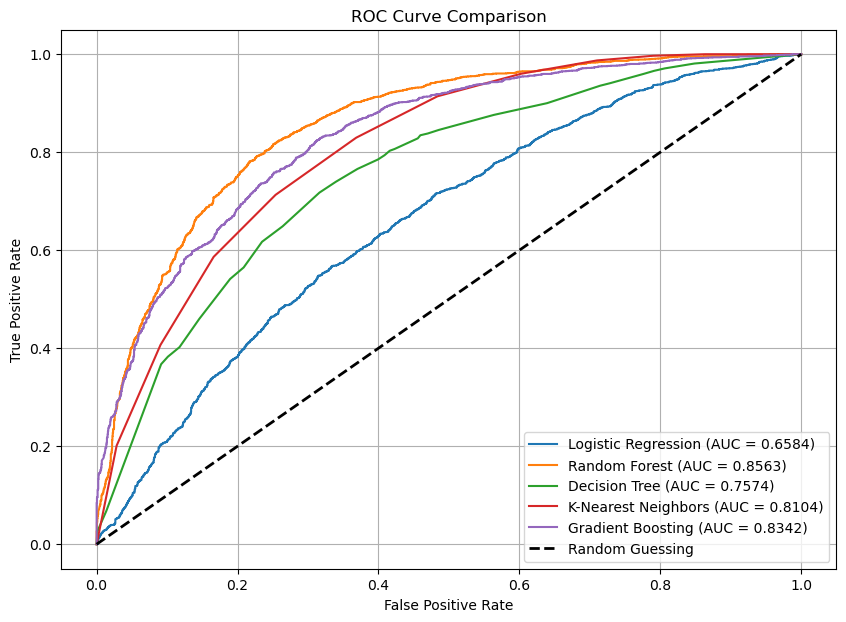

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve for all models
plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Ensure SVC models have probability enabled
    if hasattr(model, "predict_proba"):  
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
    else:
        continue  # Skip models without probability estimation

    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plotting aesthetics
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guessing")  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Insights 

1. **Random Forest** (AUC = 0.8563) performed the best, followed by **Gradient Boosting** (AUC = 0.8342. Both models demonstrate strong predictive capabilities with a good balance between True Positive Rate and False Positive Rate.

2. **Logistic Regression** has the lowest AUC (0.6584), indicating weaker classification performance compared to tree-based models. It struggles to distinguish between classes effectively.

3. **Decision Tree** (AUC = 0.7574) and K-Nearest Neighbors (AUC = 0.8104) perform moderately well, but they are outperformed by ensemble methods like Random Forest and Gradient Boosting.

4. **The diagonal dashed line** represents random guessing (AUC = 0.5). Since all models perform significantly above this line, they offer meaningful predictive value




After evaluating multiple machine learning models, **Random Forest** emerged as the best-performing model based on key performance metrics. It achieved an **accuracy of 0.8638** and the highest **AUC score (0.8563)** in the ROC curve analysis, indicating strong discriminatory power between classes.

## **Saving the Model**

**Joblib** : Joblib is a Python library used for efficiently saving and loading machine learning models, especially large models with complex structures.

In [168]:
import joblib # Importing library

# Saveing the trained model
joblib.dump(best_rf, "random_forest_model.pkl")
print("Model saved successfully!")


Model saved successfully!


### **Pipeline for ML Model**

A **machine learning pipeline** was implemented to automate data preprocessing, feature selection, and model training, ensuring efficiency and reproducibility.

* Data Preprocessing: Missing values were handled using an imputer, and feature scaling was applied for consistency.

* Feature Selection: Mutual Information (SelectKBest) was used to select the most relevant features.

* Handling Imbalanced Data: SMOTE was applied to balance class distribution.

* Model Training: Random Forest was chosen as the final model after hyperparameter tuning.

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline

# Define the pipeline
pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Standardize the data
    ('feature_selection', SelectKBest(mutual_info_classif, k=12)),  # Select top 12 features
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to handle imbalance
    ('classifier', RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42))  # Train Random Forest
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=12,
                             score_func=<function mutual_info_classif at 0x000002785B8EC9A0>)),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [185]:
# Saving the Pipeline
joblib.dump(pipe, 'pipeline.joblib')
print("Pipeline saved successfully!")

Pipeline saved successfully!


### **Test with Unseen Data**

In [208]:
# Load the saved pipeline
loaded_pipe = joblib.load('pipeline.joblib')

# Load the test data
df_test = pd.read_csv('unseen_data.csv')

# Make predictions on the test data
predictions = loaded_pipe.predict(df_test)

# Print the predictions
print(predictions)

[0 1 1 0 0 1 1]


### Insights

1. Defaulter Prediction: Out of 7 test cases, 4 users were predicted as defaulters (1), while 3 were classified as non-defaulters (0).

2. Balanced Detection: The model detects both defaulters and non-defaulters, indicating it is not overly biased toward one class.

## **Conclusion**

This research focused on predicting default payments among customers in Taiwan using various machine learning models. In this project, we explored multiple machine learning models to predict defaulters, with Random Forest emerging as the best-performing model after hyperparameter tuning. The model achieved a balanced trade-off between precision and recall, ensuring reliable predictions.

**Key Findings**:

* Data preprocessing, including handling missing values, feature selection, and scaling, significantly improved model performance.

* Key steps such as feature selection, handling class imbalance with SMOTE, and implementing a robust pipeline enhanced the model's performance and scalability. 

## Future Improvements:

* The dataset is specific to Taiwan, so the model may need adjustments for different regions.

* Future work can focus on expanding the dataset and improving feature selection techniques for better performance.

* Real-time data updates could improve adaptability over time.

## **Future Work:**
- Implement deep learning models to explore potential accuracy improvements.

- 
Update the model periodically with new data for better generalization
  
- 
Apply resampling techniques to handle class imbalanc
  
- .
Consider adding more relevant features for improved predictive power.

## **Final Thoughts**
The Random Forest model has proven to be a reliable approach for predicting credit default risk. By implementing an automated pipeline, we have created a scalable solution for financial institutions to assess risk more effectively. Future enhancements could involve integrating real-time data and improving feature selection techniques for better predictions.

